In [1]:
# Import all libraries in the top so that its easier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

In [2]:
# Import Genetic CSV
# TODO:: Get it from hosted site or Host the data source somewhere
geneticsDS = pd.read_csv('/Users/rajip/Documents/MIT/Maths and Stats (MDA511)/Assignment2/genetics.csv')
geneticsDS.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
geneticsDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [4]:
# Drop useless columns for analytics. Some column might be needed but ignored for now
finalDF = geneticsDS.drop(['self_employed','state','work_interfere','no_employees','leave','phys_health_consequence','coworkers','supervisor','phys_health_interview','mental_vs_physical','comments','remote_work','benefits','wellness_program','anonymity'], axis=1)
finalDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   family_history             1259 non-null   object
 5   treatment                  1259 non-null   object
 6   tech_company               1259 non-null   object
 7   care_options               1259 non-null   object
 8   seek_help                  1259 non-null   object
 9   mental_health_consequence  1259 non-null   object
 10  mental_health_interview    1259 non-null   object
 11  obs_consequence            1259 non-null   object
dtypes: int64(1), object(11)
memory usage: 118.2+ KB


In [5]:
# Filter Data between age 12 to 70
geneticsDS = geneticsDS[(geneticsDS['Age'] > 12) & (geneticsDS['Age'] < 70)]
geneticsDS['Age'].min()
geneticsDS['Age'].max()
geneticsDS.describe()

,Age
count,1250.000000
mean,32.044800
std,7.203076
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,65.000000


In [6]:
addictionDS = pd.read_csv('/Users/rajip/Documents/MIT/Maths and Stats (MDA511)/Assignment2/addiction.csv')
addictionDS.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,Yes,No,No,Yes,No,No,No,Yes,No,No,No
1,No,Yes,NaN,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
2,No,No,No,No,No,Yes,Yes,Yes,No,No,No
3,Yes,No,Yes,Yes,No,Yes,No,No,No,Yes,Yes
4,Yes,Yes,No,NaN,No,Yes,Yes,Yes,No,No,Yes


In [7]:
addictionDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50342 entries, 0 to 50341
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Experimentation                     47780 non-null  object
 1   Academic_Performance_Decline        47844 non-null  object
 2   Social_Isolation                    47792 non-null  object
 3   Financial_Issues                    47805 non-null  object
 4   Physical_Mental_Health_Problems     47888 non-null  object
 5   Legal_Consequences                  47766 non-null  object
 6   Relationship_Strain                 47799 non-null  object
 7   Risk_Taking_Behavior                47765 non-null  object
 8   Withdrawal_Symptoms                 47730 non-null  object
 9   Denial_and_Resistance_to_Treatment  47889 non-null  object
 10  Addiction_Class                     50342 non-null  object
dtypes: object(11)
memory usage: 4.2+ MB


In [8]:
socialMediaDS = pd.read_csv('/Users/rajip/Documents/MIT/Maths and Stats (MDA511)/Assignment2/socialmedia.csv')
socialMediaDS.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [9]:
socialMediaDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             481 non-null    object 
 1   1. What is your age?                                                                                                  481 non-null    float64
 2   2. Gender                                                                                                             481 non-null    object 
 3   3. Relationship Status                                                                                                481 non-null    object 
 4   4. Occup

In [10]:
# Rename the feature to technical words
column_dict = {
    '1. What is your age?':'Age',
    '2. Gender':'Gender',
    '3. Relationship Status':'Relationship',
    '4. Occupation Status':'Occupation',
    '6. Do you use social media?':'Social_media_use',
    '7. What social media platforms do you commonly use?':'Social_media_type',
    '8. What is the average time you spend on social media every day?':'Social_media_usage',
    "11. Do you feel restless if you haven't used Social media in a while?":'Restless',
    '12. On a scale of 1 to 5, how easily distracted are you?':'Distracted_rating',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Sleepless_rating',
    "18. How often do you feel depressed or down?":'Depressed_rating'
    
}
socialMediaDS = socialMediaDS.rename(columns=column_dict)


In [11]:
# Drop the unused or unecessary features that are not actually related to depression or has other feature relevant to it
socialMediaDS = socialMediaDS.drop([
    '5. What type of organizations are you affiliated with?',
    "13. On a scale of 1 to 5, how much are you bothered by worries?",
    "19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?",
    "10. How often do you get distracted by Social media when you are busy doing something?",
    "15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?",
    "16. Following the previous question, how do you feel about these comparisons, generally speaking?",
    "17. How often do you look to seek validation from features of social media?",
    "9. How often do you find yourself using Social media without a specific purpose?",
    "14. Do you find it difficult to concentrate on things?"
],axis=1)

In [12]:
socialMediaDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           481 non-null    object 
 1   Age                 481 non-null    float64
 2   Gender              481 non-null    object 
 3   Relationship        481 non-null    object 
 4   Occupation          481 non-null    object 
 5   Social_media_use    481 non-null    object 
 6   Social_media_type   481 non-null    object 
 7   Social_media_usage  481 non-null    object 
 8   Restless            481 non-null    int64  
 9   Distracted_rating   481 non-null    int64  
 10  Depressed_rating    481 non-null    int64  
 11  Sleepless_rating    481 non-null    int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 45.2+ KB


In [13]:
# Make a function that will select a probability of family history according to age
# Function to select rows based on probability for each Age
def select_row_based_on_probability(group):
    # Split the group into 'Yes' and 'No' rows
    yes_rows = group[group['family_history'] == 'Yes']
    no_rows = group[group['family_history'] == 'No']
    
    # If there are both 'Yes' and 'No' values for the same Age
    if not yes_rows.empty and not no_rows.empty:
        # Choose between 'Yes' and 'No' with 40% probability for 'Yes' and 60% for 'No'
        chosen_value = np.random.choice(['Yes', 'No'], p=[0.5, 0.5])
        
        if chosen_value == 'Yes':
            return yes_rows.iloc[0]  # Keep the first 'Yes' row
        else:
            return no_rows.iloc[0]  # Keep the first 'No' row
    elif not yes_rows.empty:
        return yes_rows.iloc[0]  # Keep the first 'Yes' row if no 'No' exists
    else:
        return no_rows.iloc[0]  # Keep the first 'No' row if no 'Yes' exists

In [14]:
# Reset index for the table
finalDF=finalDF.reset_index(drop=True)
finalDF.head()

,Timestamp,Age,Gender,Country,family_history,treatment,tech_company,care_options,seek_help,mental_health_consequence,mental_health_interview,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,No,Yes,Yes,Not sure,Yes,No,No,No
1,2014-08-27 11:29:37,44,M,United States,No,No,No,No,Don't know,Maybe,No,No
2,2014-08-27 11:29:44,32,Male,Canada,No,No,Yes,No,No,No,Yes,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,Yes,Yes,Yes,Yes,No,Yes,Maybe,Yes
4,2014-08-27 11:30:22,31,Male,United States,No,No,Yes,No,Don't know,No,Yes,No


In [15]:
# Check if there is any null or na values in dataset
finalDF.isnull().sum()
finalDF.isna().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
family_history               0
treatment                    0
tech_company                 0
care_options                 0
seek_help                    0
mental_health_consequence    0
mental_health_interview      0
obs_consequence              0
dtype: int64

In [16]:
# Apply the function to each group (grouped by 'Age')
finalDF_suitable = finalDF.groupby('Age', group_keys=True).apply(select_row_based_on_probability)

# Reset index and ensure no redundant columns
finalDF_suitable = finalDF_suitable.reset_index(drop=True)
finalDF_suitable.shape[0]

/var/folders/gw/g4f9j0rj55j7wlpd_183__qm0000gq/T/ipykernel_32406/3927824030.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  finalDF_suitable = finalDF.groupby('Age', group_keys=True).apply(select_row_based_on_probability)


53

In [17]:
# Check the data structure of Social Media Dataset
socialMediaDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           481 non-null    object 
 1   Age                 481 non-null    float64
 2   Gender              481 non-null    object 
 3   Relationship        481 non-null    object 
 4   Occupation          481 non-null    object 
 5   Social_media_use    481 non-null    object 
 6   Social_media_type   481 non-null    object 
 7   Social_media_usage  481 non-null    object 
 8   Restless            481 non-null    int64  
 9   Distracted_rating   481 non-null    int64  
 10  Depressed_rating    481 non-null    int64  
 11  Sleepless_rating    481 non-null    int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 45.2+ KB


In [18]:
# Filter data between age 12 to 70 because there is an outlier for age which we will remove from the dataset
socialMediaDS = socialMediaDS[(socialMediaDS['Age']>12) & (socialMediaDS['Age']<70)]

In [19]:
# Make sure there are datas that are higher than age 50
(socialMediaDS['Age']>50).value_counts()

Age
False    470
True      10
Name: count, dtype: int64

In [20]:
# See all genders in dataset
print(socialMediaDS['Gender'].unique())

['Male' 'Female' 'Nonbinary ' 'Non-binary' 'NB' 'unsure ' 'Trans'
 'Non binary ' 'There are others???']


In [21]:
# Transformation of Gender data into Male, Female and Others. The data contains other values are well so we will be transforming these data to others.
socialMediaDS['Gender'] = socialMediaDS['Gender'].str.lower().map({'male':'Male','Nonbinary':'Male','female':'Female'}).fillna('Others')
print(socialMediaDS['Gender'].unique())

['Male' 'Female' 'Others']


In [22]:
# Aggregrating number of genders in dataset
count = socialMediaDS['Gender'].value_counts().loc[['Male', 'Female','Others']]
print(count)

Gender
Male      211
Female    262
Others      7
Name: count, dtype: int64


In [23]:
# Describing the dataset of socialmedia
socialMediaDS.describe()

,Age,Restless,Distracted_rating,Depressed_rating,Sleepless_rating
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,26.001458,2.585417,3.347917,3.252083,3.197917
std,9.471690,1.256713,1.176402,1.311979,1.460830
min,13.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,2.000000,3.000000,2.000000,2.000000
50%,22.000000,2.000000,3.000000,3.000000,3.000000
75%,26.000000,3.000000,4.000000,4.000000,5.000000
max,69.000000,5.000000,5.000000,5.000000,5.000000


In [24]:
# Cbecking if there is na or null values in the dataset
socialMediaDS.isnull().sum()
socialMediaDS.isna().sum()

Timestamp             0
Age                   0
Gender                0
Relationship          0
Occupation            0
Social_media_use      0
Social_media_type     0
Social_media_usage    0
Restless              0
Distracted_rating     0
Depressed_rating      0
Sleepless_rating      0
dtype: int64

In [25]:
# Exploring different type of Relationship status of the dataset
socialMediaDS['Relationship'].unique()

array(['In a relationship', 'Single', 'Married', 'Divorced'], dtype=object)

In [26]:
# Transforming data of age from float value to integer so that we can combine or merge the fata
socialMediaDS['Age'] = socialMediaDS['Age'].astype(int)

In [27]:
# Merge two datasets using age
merged_df = pd.merge(finalDF_suitable[['Age', 'family_history']],socialMediaDS, on='Age',how='inner')
# Checking the columns and number of rows in dataset
mrows = merged_df.shape[0]
mcols = merged_df.shape[1]
print(mrows,mcols)

459 13


In [28]:
# Validating the final dataset by checking any na or null values
merged_df.isnull().sum()
merged_df.isna().sum()

Age                   0
family_history        0
Timestamp             0
Gender                0
Relationship          0
Occupation            0
Social_media_use      0
Social_media_type     0
Social_media_usage    0
Restless              0
Distracted_rating     0
Depressed_rating      0
Sleepless_rating      0
dtype: int64

In [29]:
# Count of people according to type of family history
counts = merged_df.groupby('family_history')['family_history'].count()
print(counts)

family_history
No     323
Yes    136
Name: family_history, dtype: int64


In [30]:
# Confirming the dataset has data of people which has higher age than 50
merged_df.columns
(merged_df['Age']>50).value_counts()

Age
False    451
True       8
Name: count, dtype: int64

In [31]:
# Writing a function to derive trauma from the data in dataset such as family_history, restless, Sleepless_rating
def calculateChildhoodTrauma(row):
    random_value = np.random.rand()
    if(random_value > 0.5):
        threshold =  (row['Restless']>3 and row['Sleepless_rating']>3)  or row['family_history']=='Yes'
        return threshold
    else:
        return False

print(calculateChildhoodTrauma(merged_df.iloc[0]))

False


In [32]:
# Applying new feature which is Trauma in dataset using the above function
merged_df['Trauma'] = merged_df.apply(calculateChildhoodTrauma, axis=1)

In [33]:
# Making sure there is no na or null values after merge
merged_df.isna().sum()
merged_df.isnull().sum()

Age                   0
family_history        0
Timestamp             0
Gender                0
Relationship          0
Occupation            0
Social_media_use      0
Social_media_type     0
Social_media_usage    0
Restless              0
Distracted_rating     0
Depressed_rating      0
Sleepless_rating      0
Trauma                0
dtype: int64

In [34]:
# Counting the number of users that are using social media
counts = merged_df.groupby('Social_media_use')['Social_media_use'].count()
print(counts)

Social_media_use
No       3
Yes    456
Name: Social_media_use, dtype: int64


In [35]:
# Counting the number of users that has trauma
merged_df.groupby('Trauma')['Trauma'].count()

Trauma
False    364
True      95
Name: Trauma, dtype: int64

In [36]:
# Defining functions to derive addiction risk leve from two datasets addiction and the merged dataset
# Define heuristic rules for addiction risk for main dataset
def derive_addiction_level(row):
    if ((row["Sleepless_rating"] > 3) or (row['Restless']==1)) and row["Trauma"] == True and row["Depressed_rating"] > 3:
        return "Likely Addicted"
    elif row["Distracted_rating"] > 3 and row["Depressed_rating"] > 3:
        return "At Risk"
    else:
        return "Low Risk"

# Derive Risk_Level based on existing columns for addiction dataset
def derive_risk_level(row):
    if row["Addiction_Class"] == "Yes":
        return "Likely Addicted"
    elif row["Experimentation"] == "Yes" and row["Social_Isolation"] == "Yes":
        return "At Risk"
    else:
        return "Low Risk"

In [37]:
# Generating or Deriving the Addiction_Risk feature in merged dataset
merged_df['Addiction_Risk'] = merged_df.apply(derive_addiction_level, axis=1)
merged_df.head(5)
merged_df.groupby('Addiction_Risk')['Addiction_Risk'].count()

Addiction_Risk
At Risk            100
Likely Addicted     36
Low Risk           323
Name: Addiction_Risk, dtype: int64

In [38]:
# Counting the number of risks in addiction Dataset
addictionDS['Addiction_Risk'] =  addictionDS.apply(derive_risk_level, axis=1)
addictionDS.groupby('Addiction_Risk')['Addiction_Risk'].count()

Addiction_Risk
At Risk             8027
Likely Addicted    15072
Low Risk           27243
Name: Addiction_Risk, dtype: int64

In [39]:
# Dropping all na values from the dataset
addictionDS = addictionDS.dropna()

In [40]:
# Checking if there are any row or data that has null or na values
addictionDS.isnull().sum()
addictionDS.shape[1]
addictionDS.isna().sum()

Experimentation                       0
Academic_Performance_Decline          0
Social_Isolation                      0
Financial_Issues                      0
Physical_Mental_Health_Problems       0
Legal_Consequences                    0
Relationship_Strain                   0
Risk_Taking_Behavior                  0
Withdrawal_Symptoms                   0
Denial_and_Resistance_to_Treatment    0
Addiction_Class                       0
Addiction_Risk                        0
dtype: int64

In [41]:
# Define a function to look up the corresponding 'Addiction_Class' from addictionDS based on 'Addiction_Risk'
def get_addiction_class(risk_value):
    # Use `loc` to find the corresponding 'Addiction_Class' for the 'Addiction_Risk'
    result = addictionDS.loc[addictionDS['Addiction_Risk'] == risk_value,['Addiction_Class', 'Social_Isolation', 'Withdrawal_Symptoms']]
    # If a match is found, return the value; otherwise, return NaN
    return result.iloc[0] if not result.empty else None

# Apply the function to each row of merged_df to create a new column 'Addiction_Class'
merged_df[['Addiction_Class', 'Social_Isolation', 'Withdrawal_Symptoms']] = merged_df['Addiction_Risk'].apply(get_addiction_class)

# Check the result
merged_df.head()

,Age,family_history,Timestamp,Gender,Relationship,Occupation,Social_media_use,Social_media_type,Social_media_usage,Restless,Distracted_rating,Depressed_rating,Sleepless_rating,Trauma,Addiction_Risk,Addiction_Class,Social_Isolation,Withdrawal_Symptoms
0,18,No,4/18/2022 20:53:37,Female,Single,School Student,Yes,"Facebook, Instagram, YouTube, Discord, Pinterest",Between 2 and 3 hours,3,3,3,2,False,Low Risk,No,No,No
1,18,No,4/18/2022 23:12:03,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",More than 5 hours,3,5,5,5,False,At Risk,No,Yes,No
2,18,No,4/19/2022 0:10:02,Others,Single,School Student,Yes,"Twitter, Instagram, YouTube, Reddit, TikTok",Between 2 and 3 hours,2,3,4,4,False,Low Risk,No,No,No
3,18,No,4/19/2022 2:18:48,Female,Single,University Student,Yes,"Facebook, YouTube, Reddit",Between 3 and 4 hours,3,3,5,5,False,Low Risk,No,No,No
4,18,No,5/11/2022 22:03:42,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube, Snapchat, Discor...",More than 5 hours,2,2,2,4,False,Low Risk,No,No,No


In [42]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  459 non-null    int64 
 1   family_history       459 non-null    object
 2   Timestamp            459 non-null    object
 3   Gender               459 non-null    object
 4   Relationship         459 non-null    object
 5   Occupation           459 non-null    object
 6   Social_media_use     459 non-null    object
 7   Social_media_type    459 non-null    object
 8   Social_media_usage   459 non-null    object
 9   Restless             459 non-null    int64 
 10  Distracted_rating    459 non-null    int64 
 11  Depressed_rating     459 non-null    int64 
 12  Sleepless_rating     459 non-null    int64 
 13  Trauma               459 non-null    bool  
 14  Addiction_Risk       459 non-null    object
 15  Addiction_Class      459 non-null    object
 16  Social_I

In [43]:
categorial_columns=merged_df.select_dtypes(include=['object']).columns
numerical_columns = merged_df.select_dtypes(include=['int64', 'float64']).columns

In [44]:
# Stats Description of the merged data
merged_df.describe()

,Age,Restless,Distracted_rating,Depressed_rating,Sleepless_rating
count,459.000000,459.000000,459.000000,459.000000,459.000000
mean,26.278867,2.590414,3.344227,3.261438,3.202614
std,9.147781,1.265082,1.183596,1.310545,1.456919
min,18.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,2.000000,3.000000,2.000000,2.000000
50%,22.000000,2.000000,3.000000,3.000000,3.000000
75%,26.000000,3.000000,4.000000,4.000000,5.000000
max,65.000000,5.000000,5.000000,5.000000,5.000000


In [45]:
# Checking the mean and median of the age in above dataset
print(merged_df['Age'].mean())
print(merged_df['Age'].median())


26.278867102396514
22.0


In [46]:
merged_df.columns

Index(['Age', 'family_history', 'Timestamp', 'Gender', 'Relationship',
       'Occupation', 'Social_media_use', 'Social_media_type',
       'Social_media_usage', 'Restless', 'Distracted_rating',
       'Depressed_rating', 'Sleepless_rating', 'Trauma', 'Addiction_Risk',
       'Addiction_Class', 'Social_Isolation', 'Withdrawal_Symptoms'],
      dtype='object')

In [47]:
print(merged_df[['Age', 'Depressed_rating']].corr())

                       Age  Depressed_rating
Age               1.000000         -0.391105
Depressed_rating -0.391105          1.000000


In [48]:
# Correlation between age and depressed rating
corr, p_value = pearsonr(merged_df['Age'], merged_df['Depressed_rating'])
print(f"Correlation: {corr}, P-value: {p_value}")

Correlation: -0.3911045585378523, P-value: 3.162868332304329e-18


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Restless'}>],
       [<Axes: title={'center': 'Distracted_rating'}>,
        <Axes: title={'center': 'Depressed_rating'}>],
       [<Axes: title={'center': 'Sleepless_rating'}>, <Axes: >]],
      dtype=object)

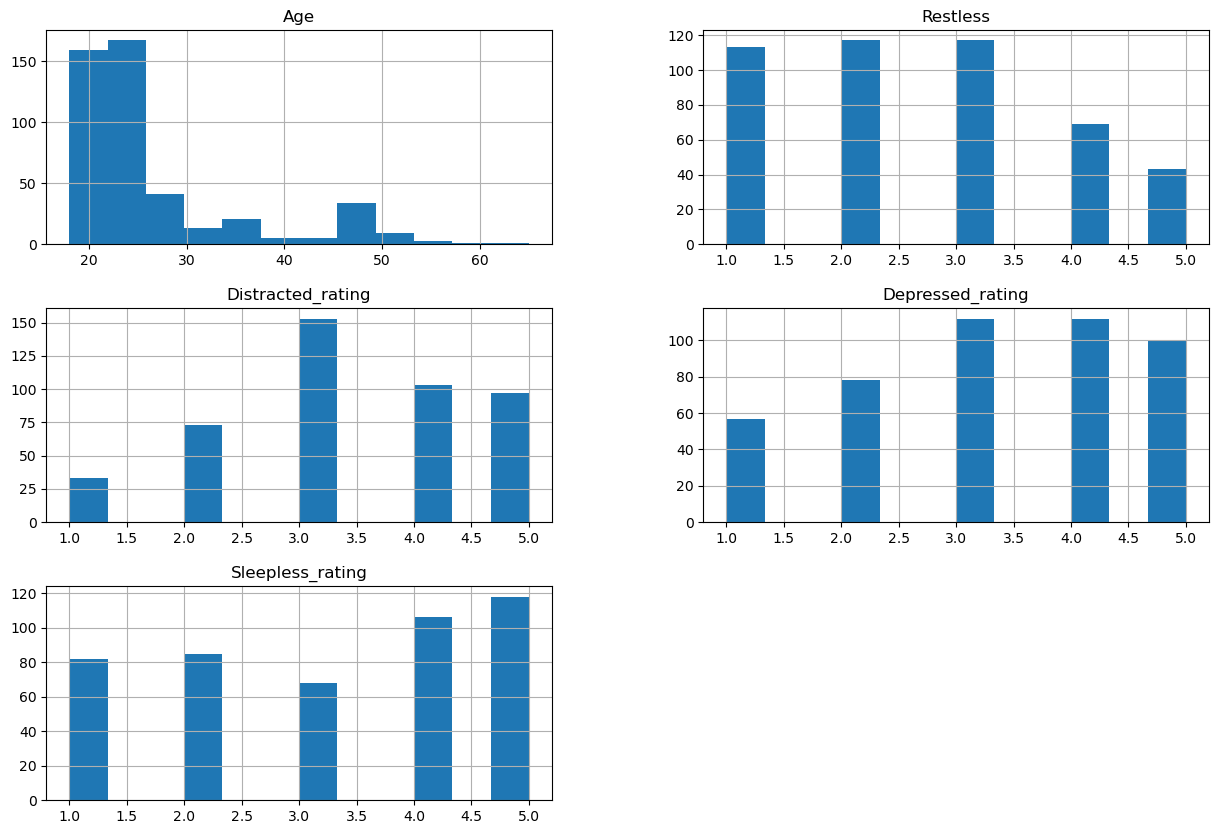

In [49]:
# Histogram for all numnerical features (Bivariate)
merged_df.hist(bins=12, figsize=(15, 10))

<Axes: >

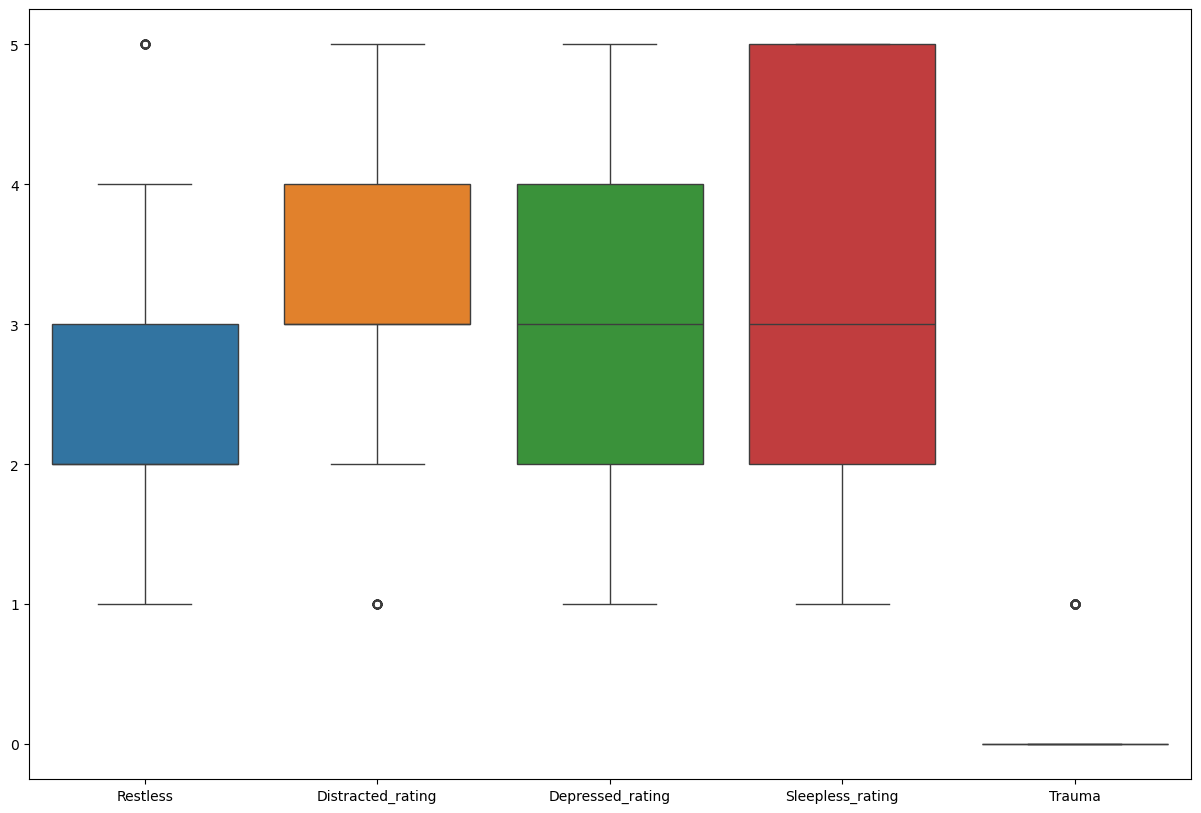

In [50]:
# Box plot for all numerical values in dataset (Bivariate)
filtered_df = merged_df.loc[:, merged_df.columns != 'Age']
plt.figure(figsize=(15, 10))
sns.boxplot(data=filtered_df)


Index(['Age', 'Restless', 'Distracted_rating', 'Depressed_rating',
       'Sleepless_rating'],
      dtype='object')


Text(0.5, 1.0, 'Coorelation Heatmap')

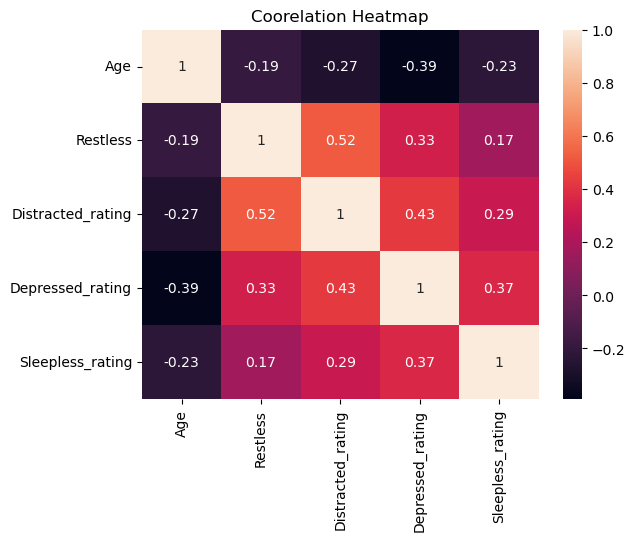

In [51]:
print(numerical_columns)
coorelation_matrix=merged_df[numerical_columns].corr()
sns.heatmap(coorelation_matrix,annot=True)
plt.title('Coorelation Heatmap')

Index(['Age', 'Restless', 'Distracted_rating', 'Depressed_rating',
       'Sleepless_rating'],
      dtype='object')


<Figure size 800x600 with 0 Axes>

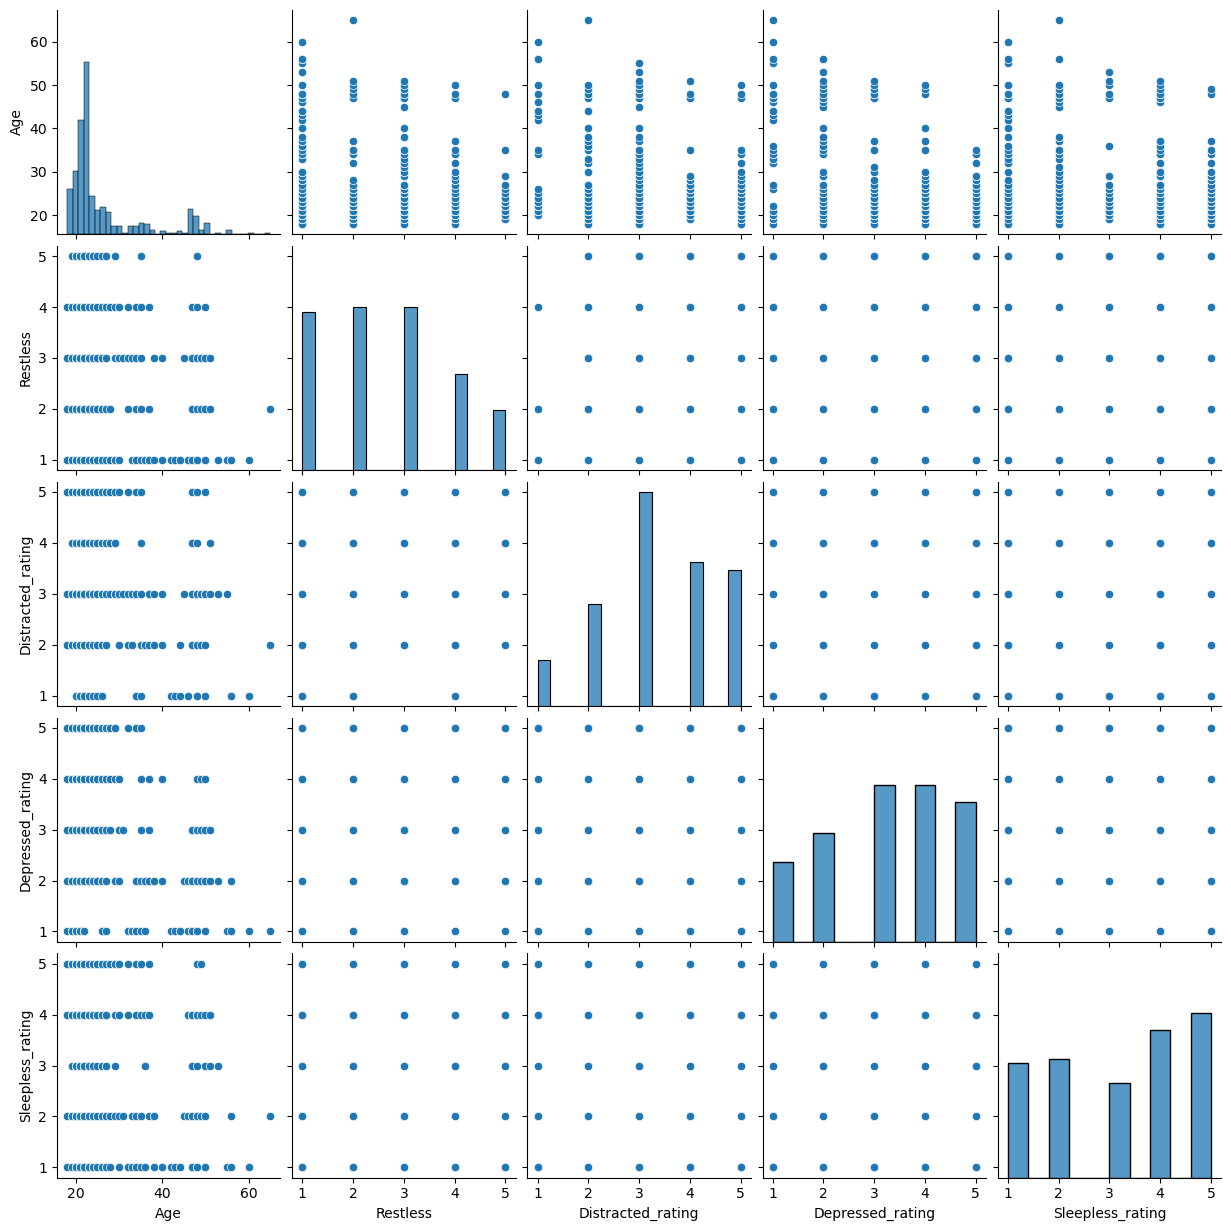

In [52]:
# Bivariate Diagrams
# Create a scatter plot matrix using seaborn
plt.figure(figsize=(8, 6))
print(numerical_columns)
sns.pairplot(merged_df[numerical_columns])
plt.show()

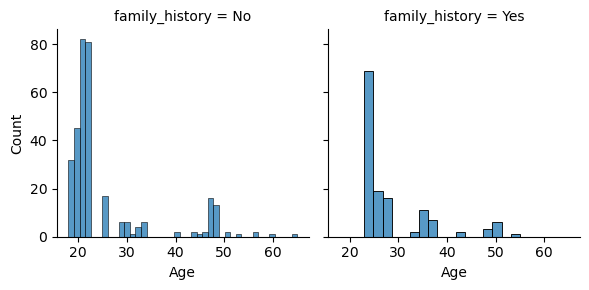

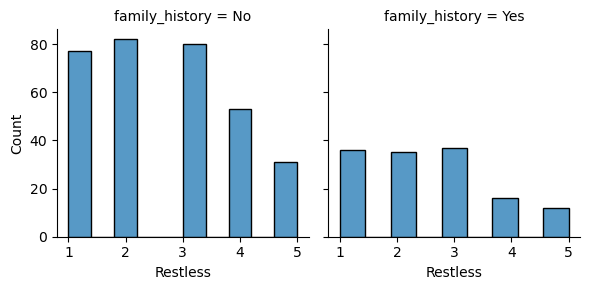

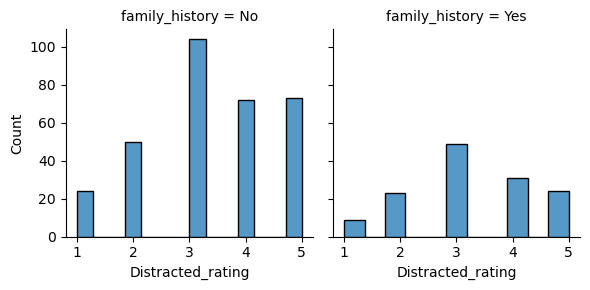

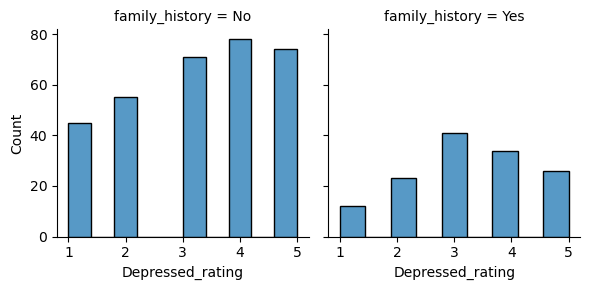

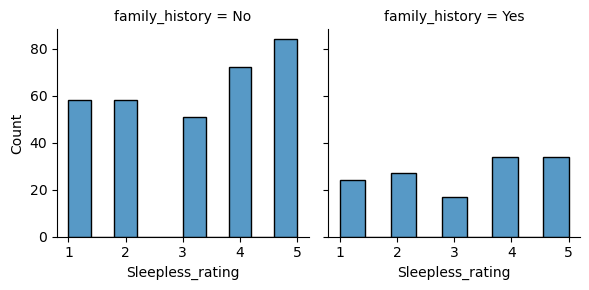

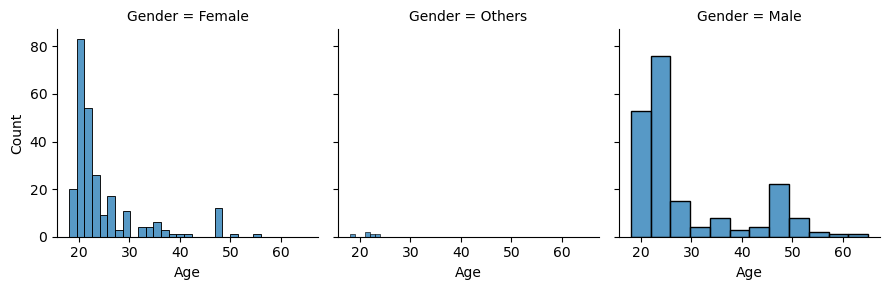

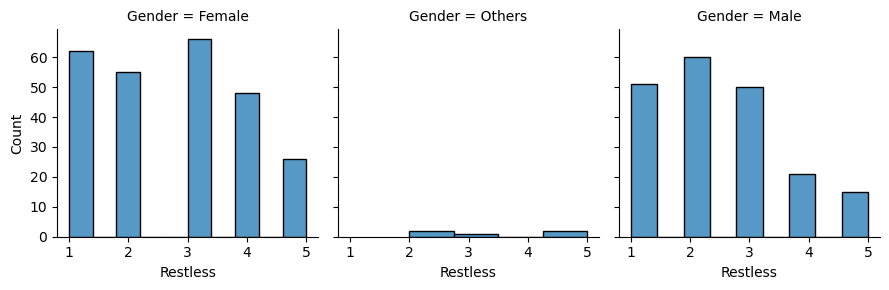

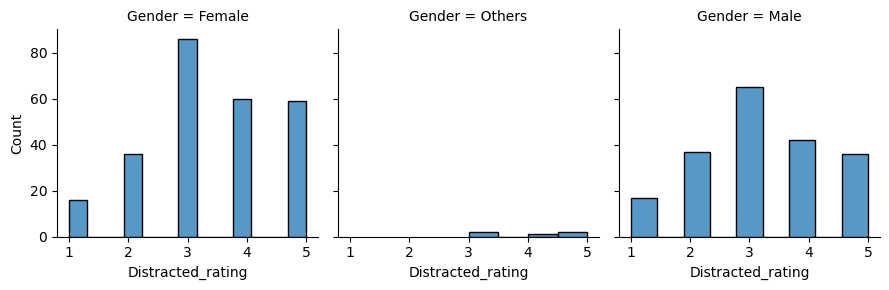

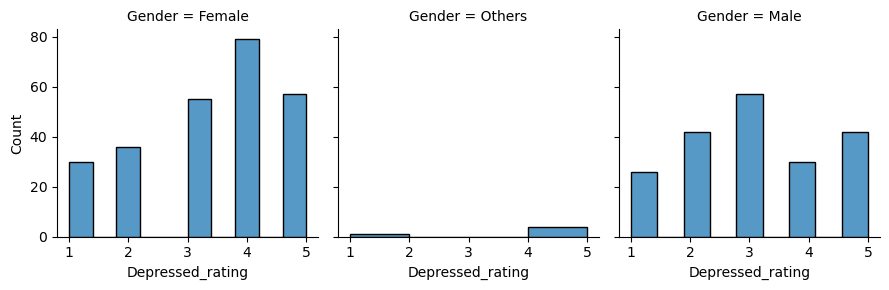

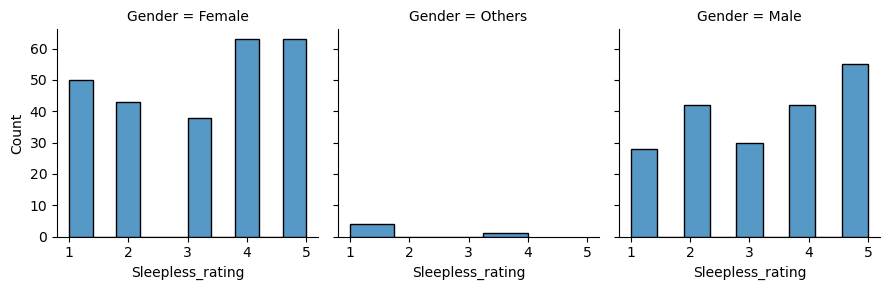

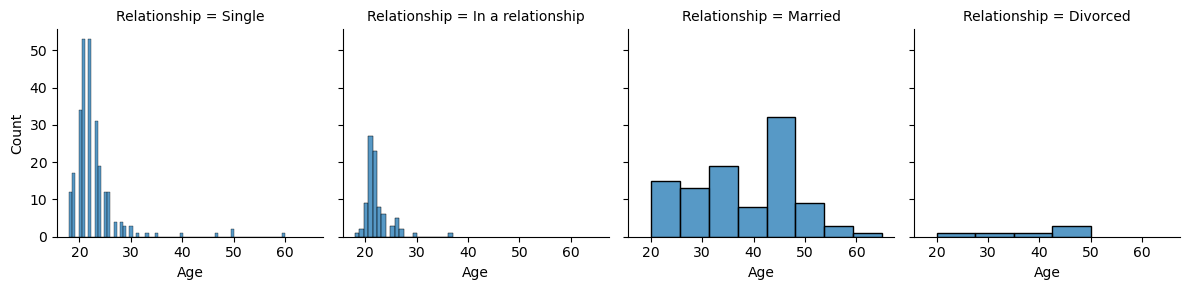

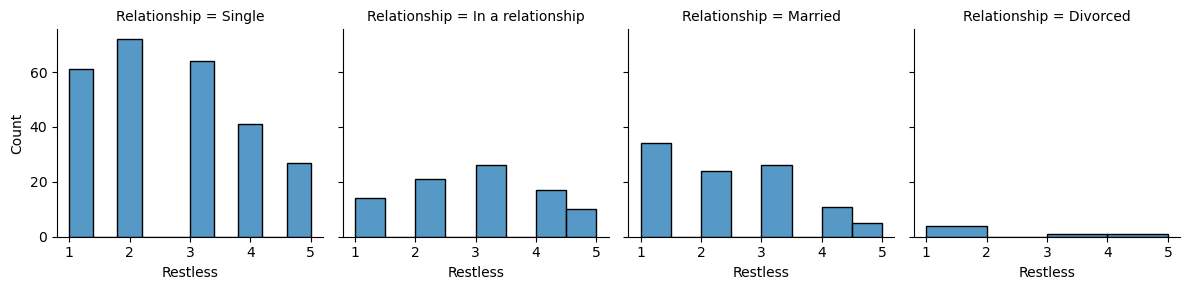

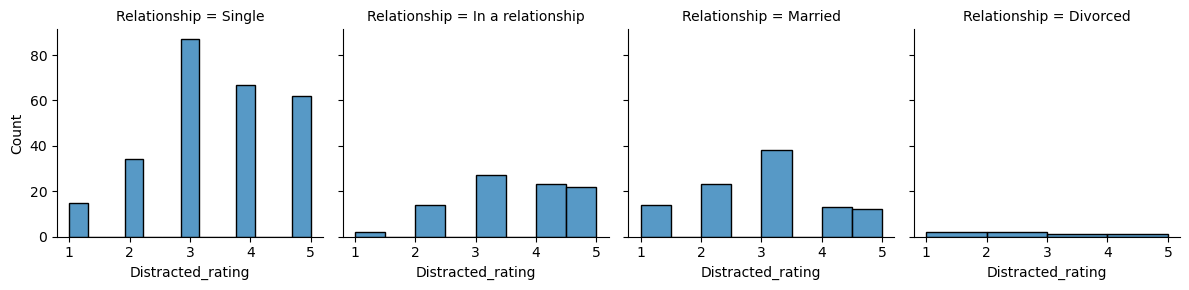

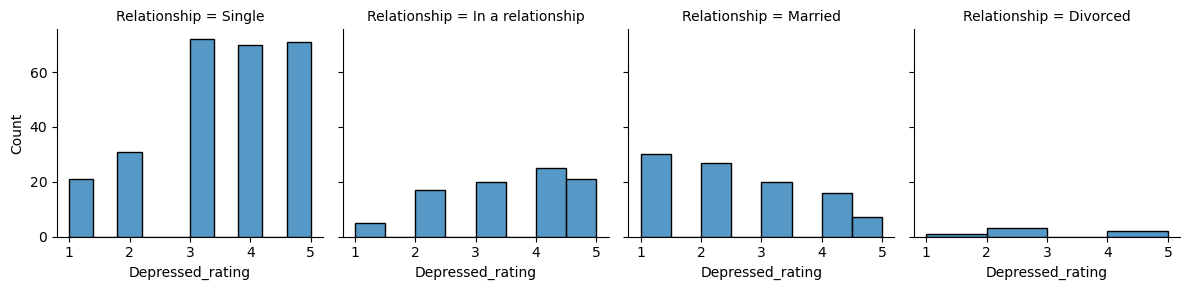

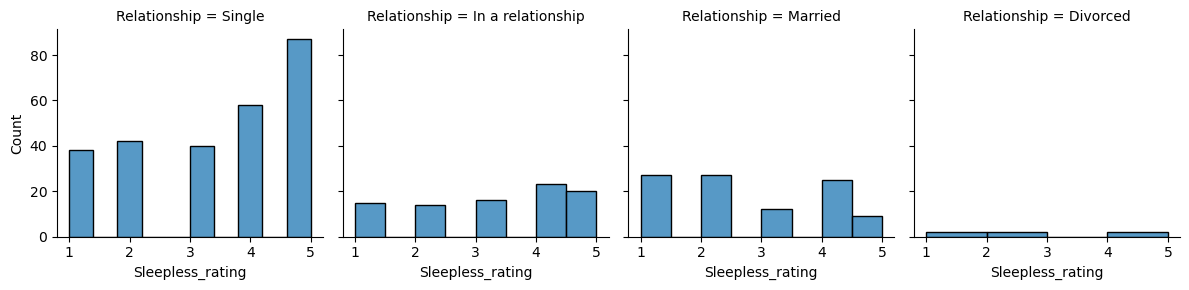

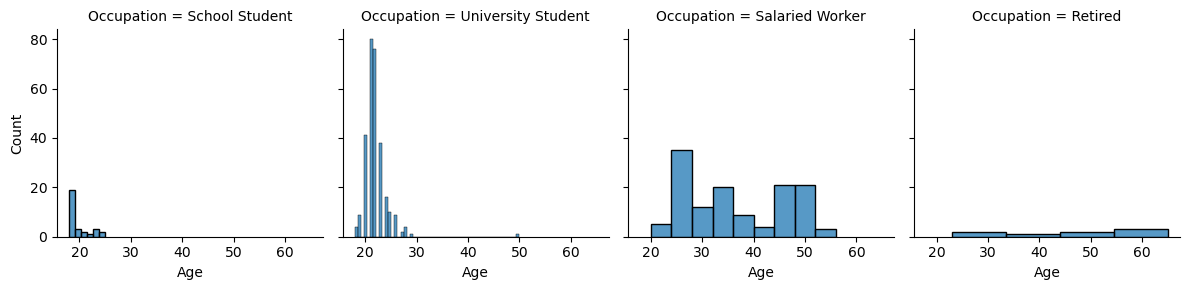

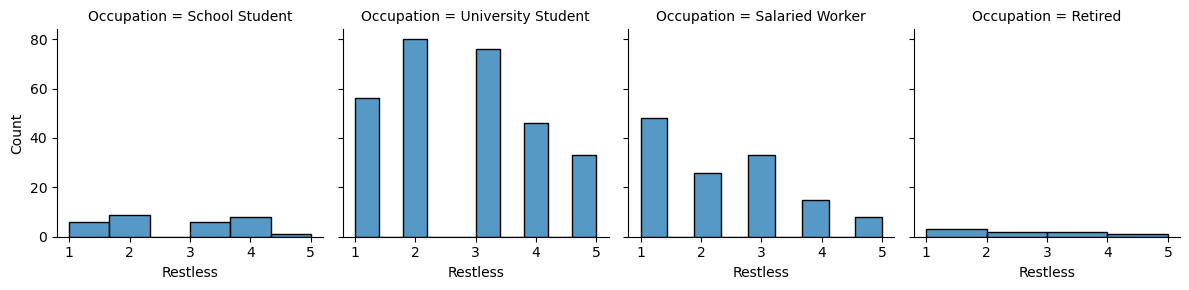

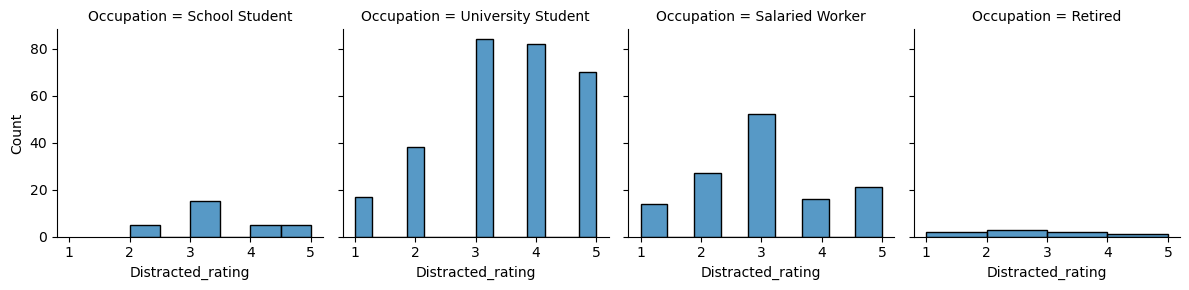

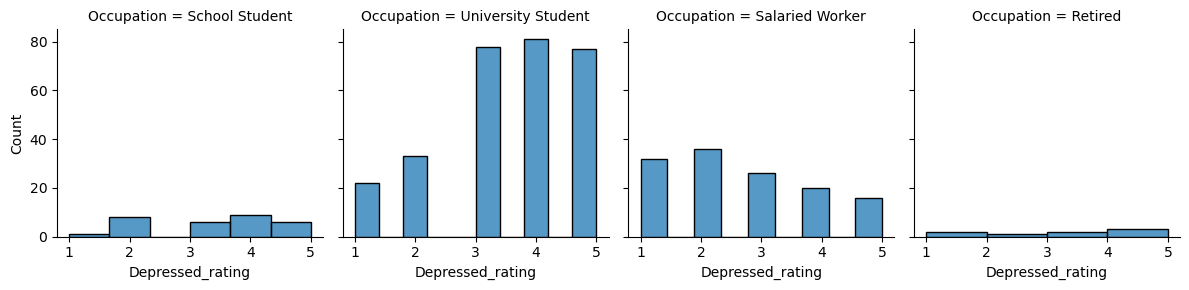

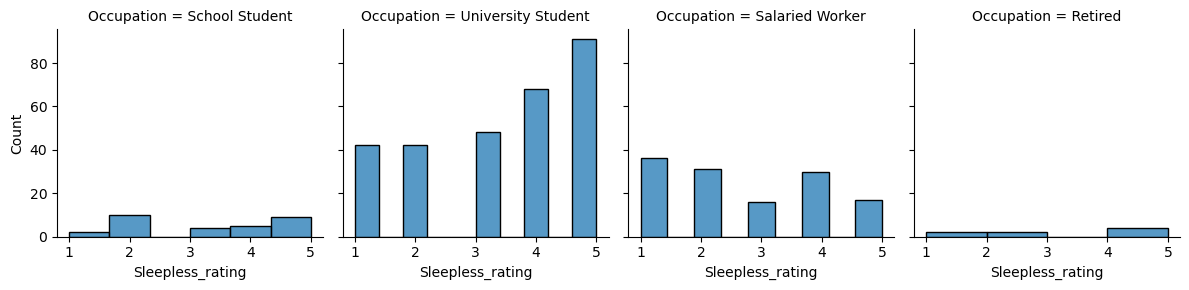

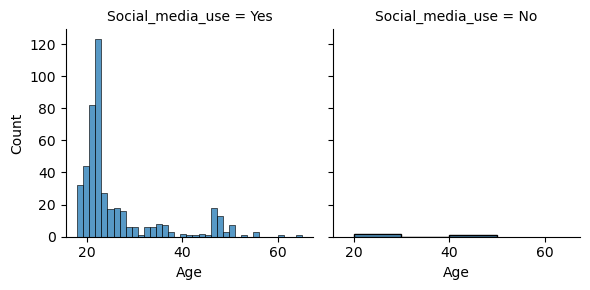

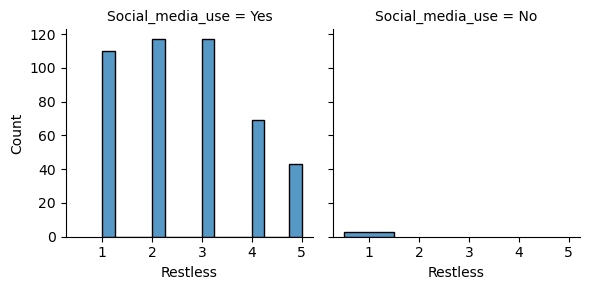

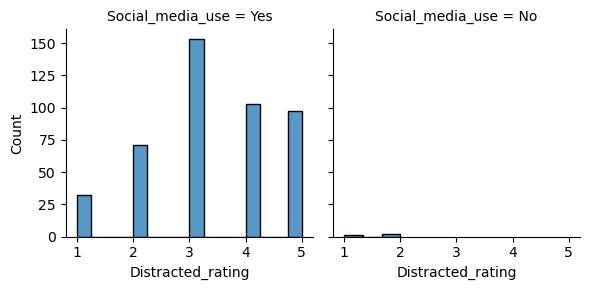

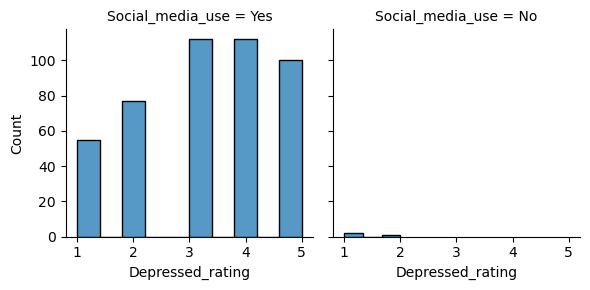

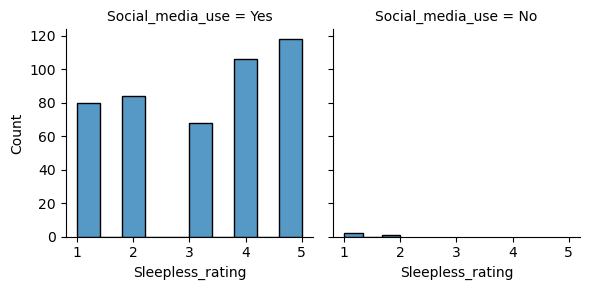

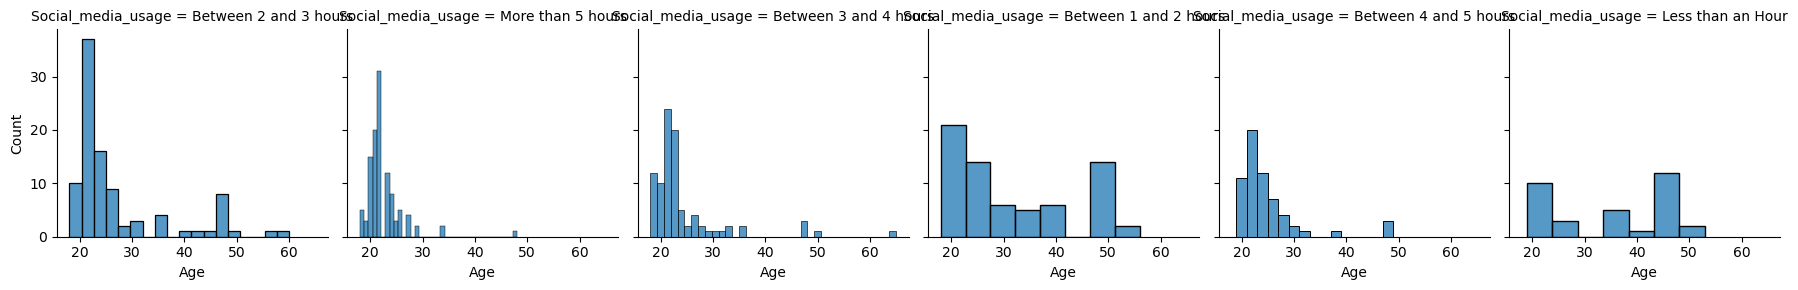

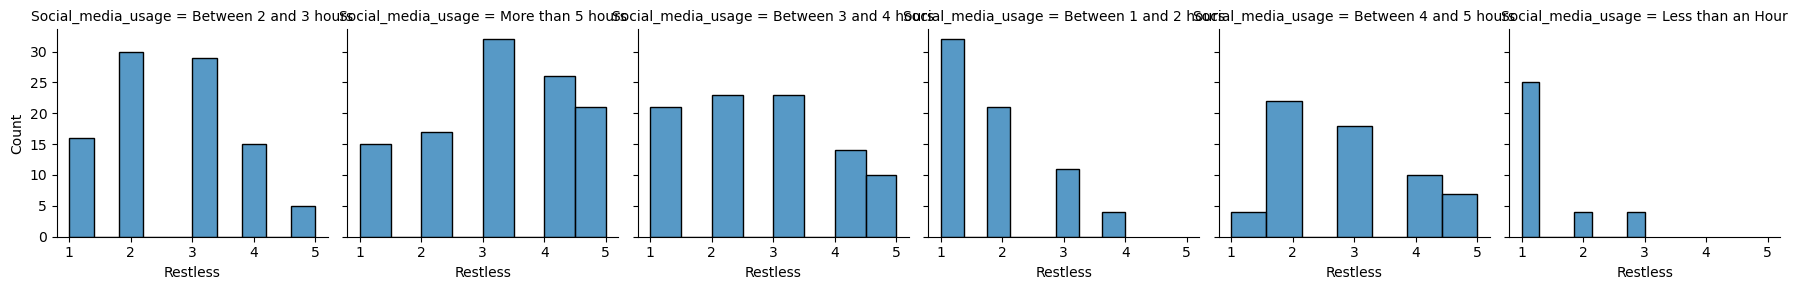

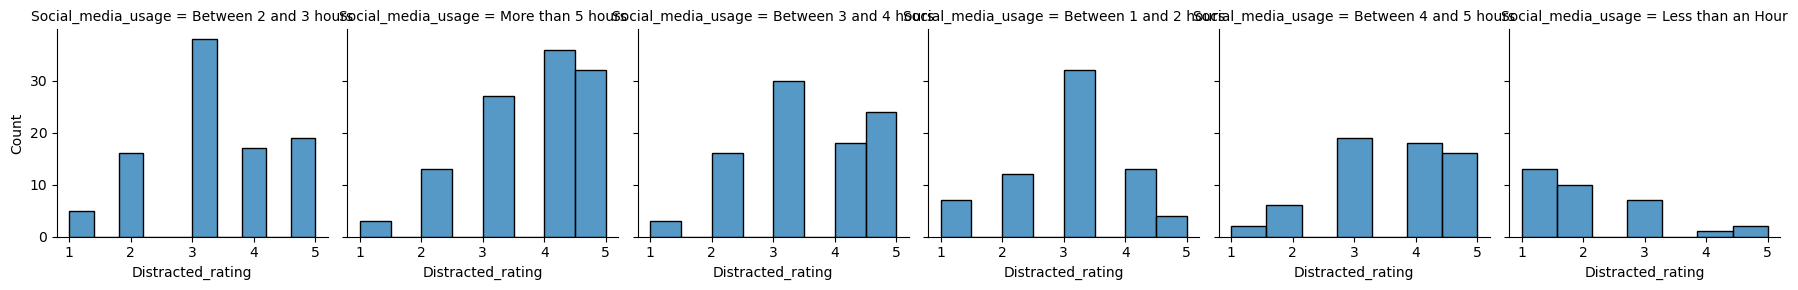

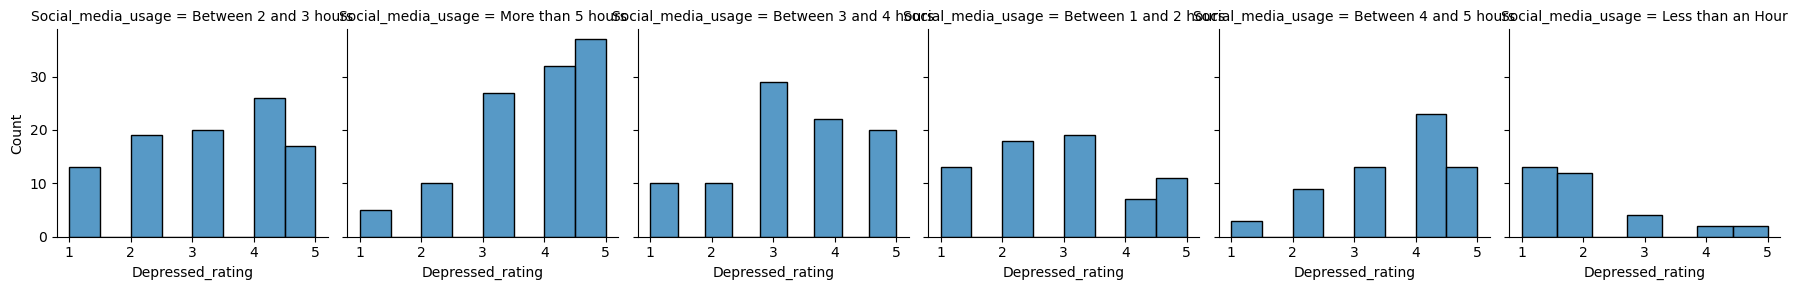

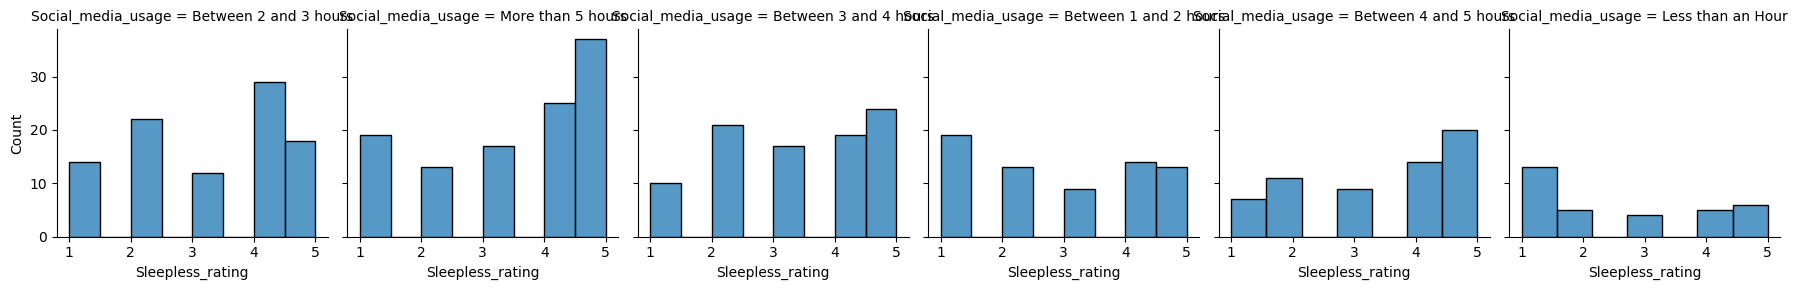

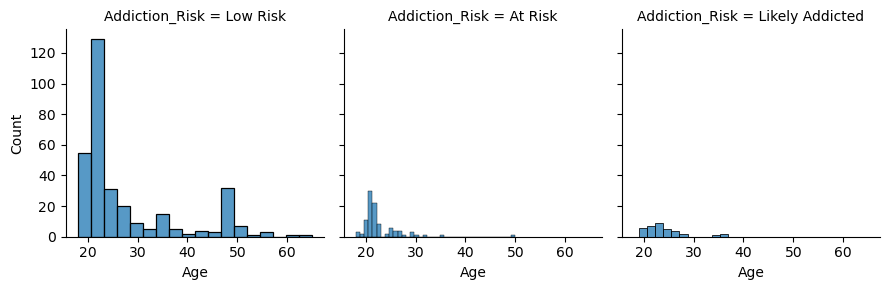

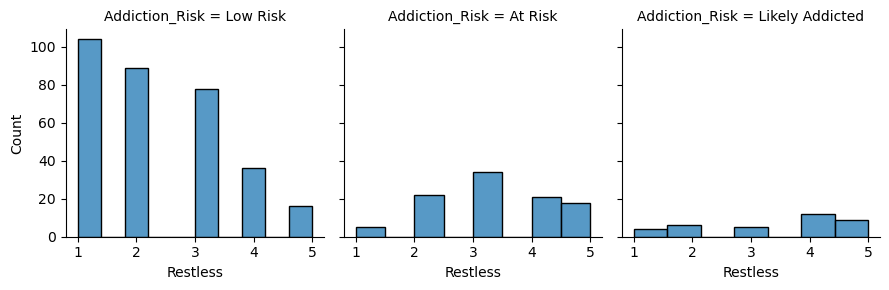

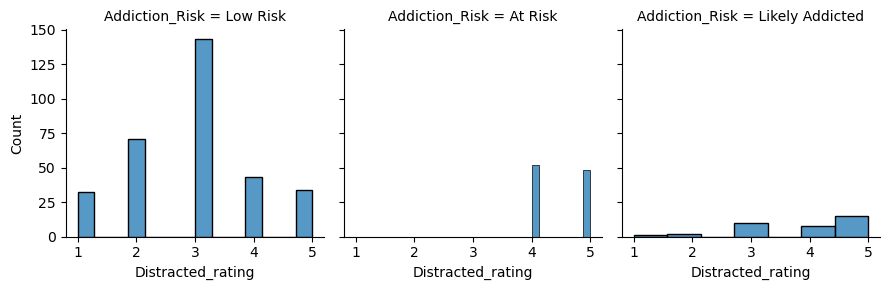

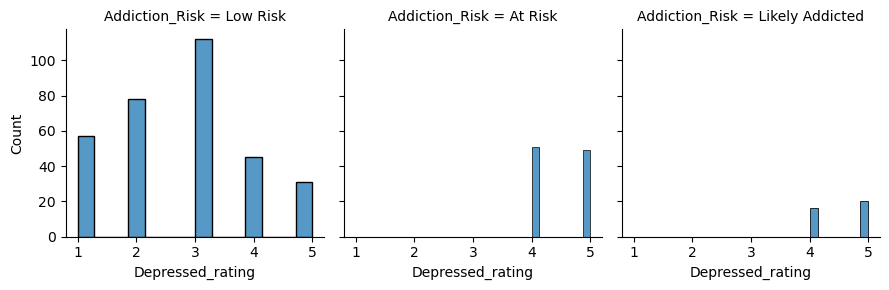

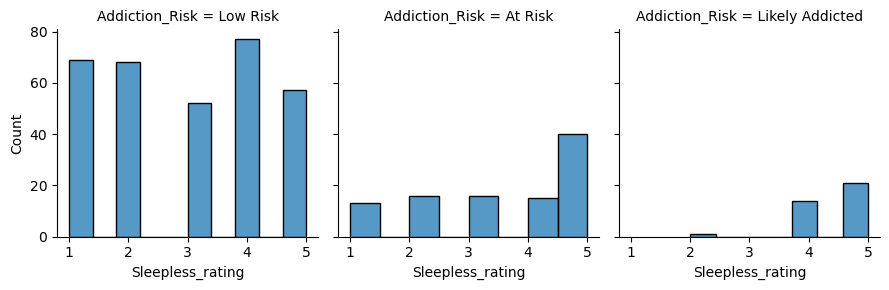

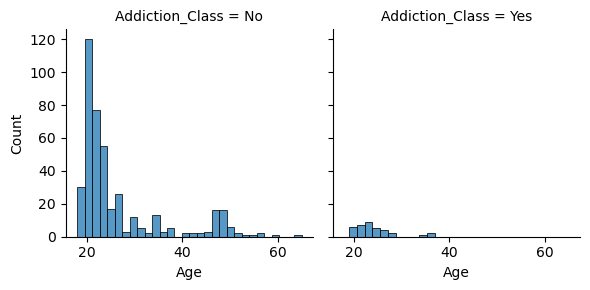

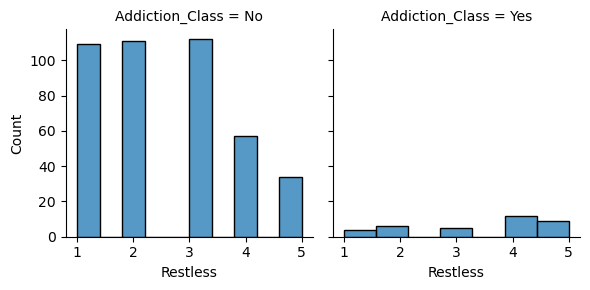

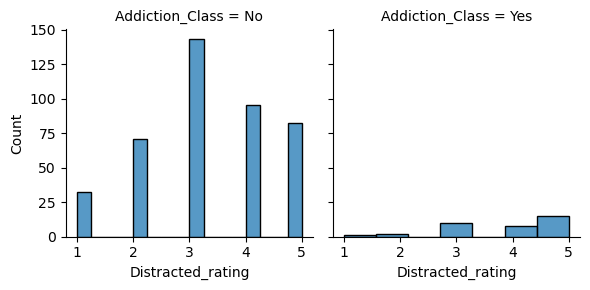

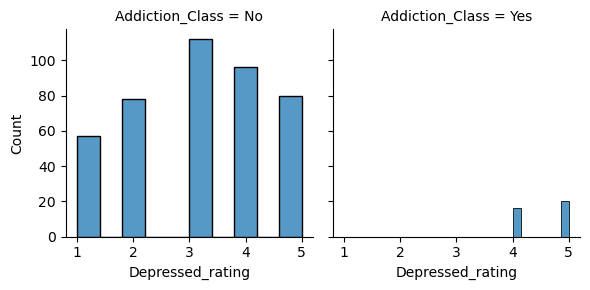

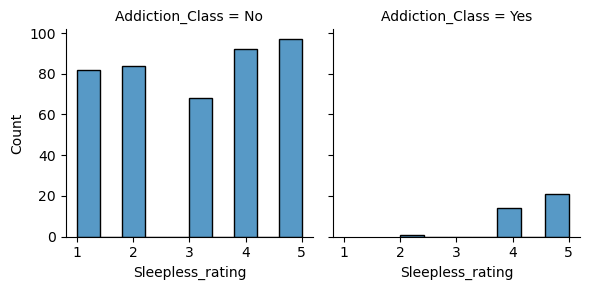

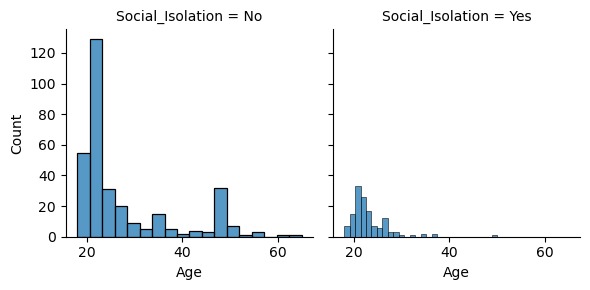

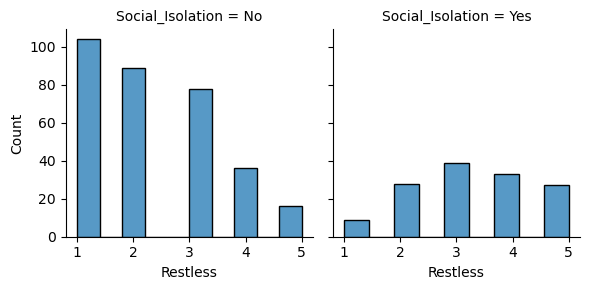

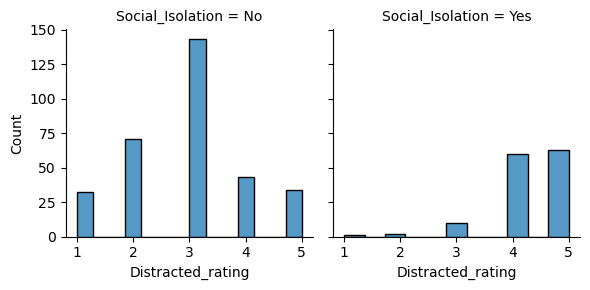

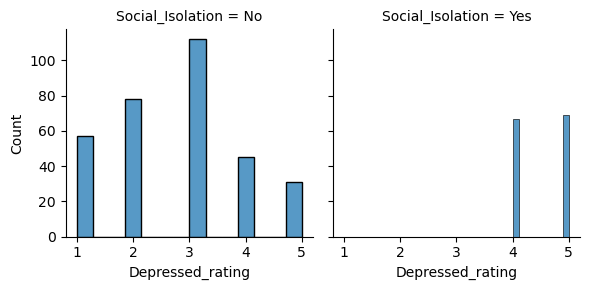

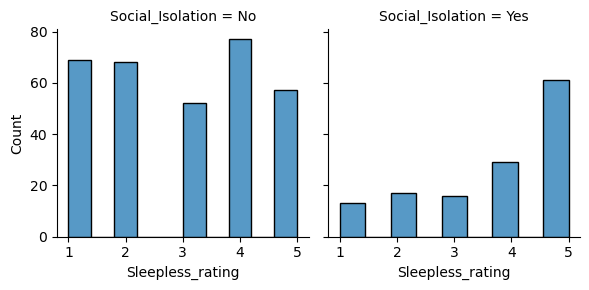

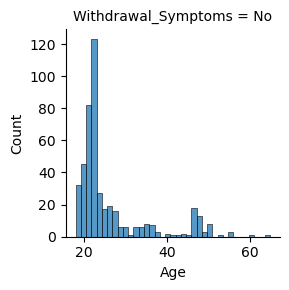

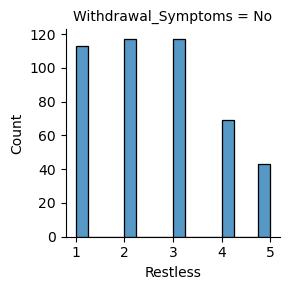

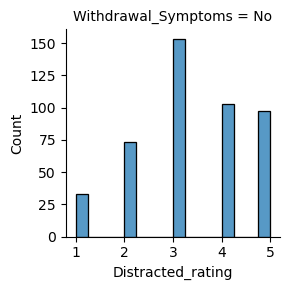

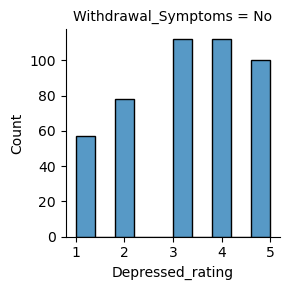

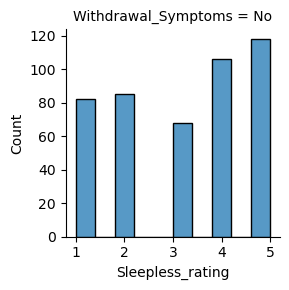

In [53]:
# Facet grid for Multivariate Analysis
for cat in categorial_columns:
    for num in numerical_columns: 
        if cat=='Timestamp' or cat=='Social_media_type': continue
        g = sns.FacetGrid(merged_df, col=cat)
        g.map(sns.histplot, num)
        plt.show()

In [54]:
# Outlier detection using zscore
from scipy.stats import zscore

for col in numerical_columns:
    z = zscore(merged_df[col])
    outliers = z.abs() > 3
    print('Outliers',outliers)

Outliers 0      False
1      False
2      False
3      False
4      False
       ...  
454     True
455     True
456     True
457     True
458     True
Name: Age, Length: 459, dtype: bool
Outliers 0      False
1      False
2      False
3      False
4      False
       ...  
454    False
455    False
456    False
457    False
458    False
Name: Restless, Length: 459, dtype: bool
Outliers 0      False
1      False
2      False
3      False
4      False
       ...  
454    False
455    False
456    False
457    False
458    False
Name: Distracted_rating, Length: 459, dtype: bool
Outliers 0      False
1      False
2      False
3      False
4      False
       ...  
454    False
455    False
456    False
457    False
458    False
Name: Depressed_rating, Length: 459, dtype: bool
Outliers 0      False
1      False
2      False
3      False
4      False
       ...  
454    False
455    False
456    False
457    False
458    False
Name: Sleepless_rating, Length: 459, dtype: bool


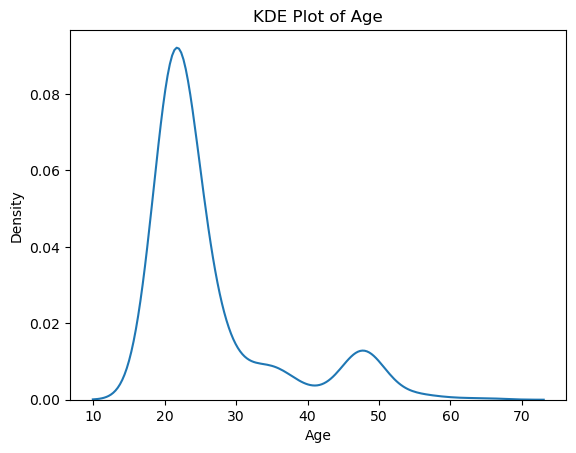

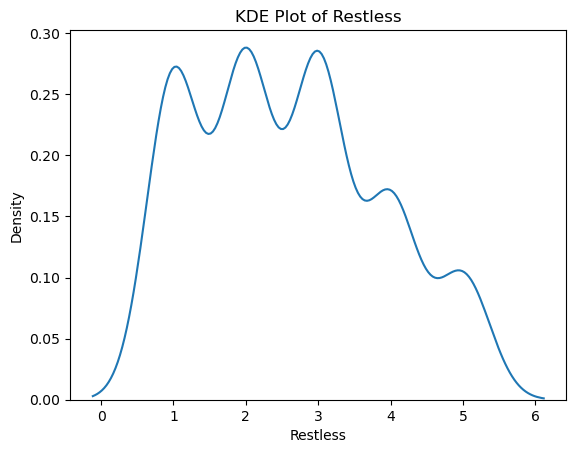

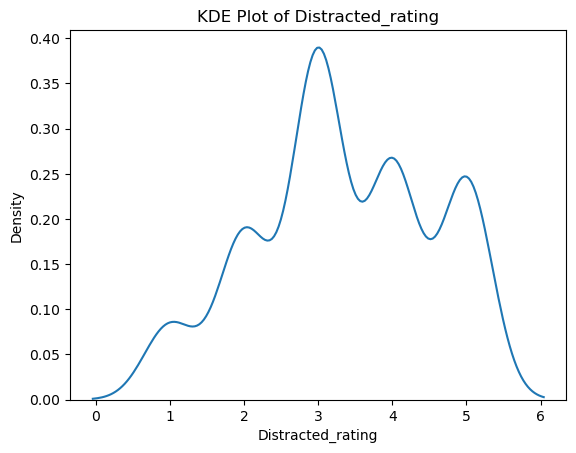

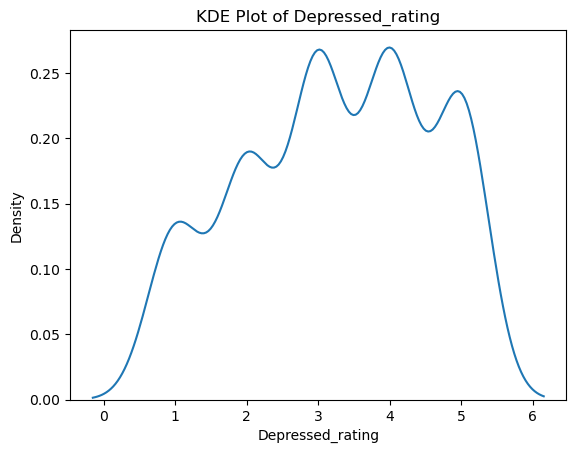

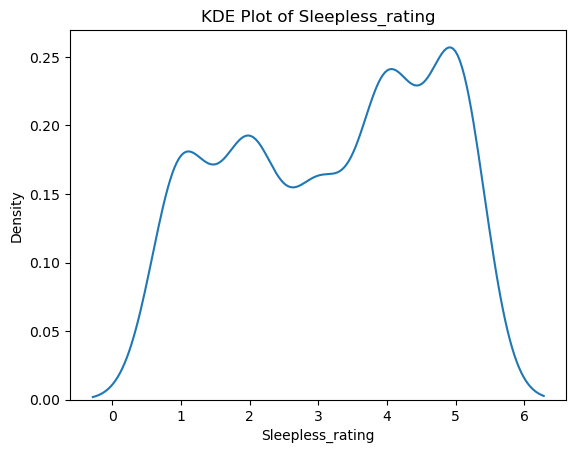

In [55]:
# Distribution Analysis with KDE Plot
for num in numerical_columns:
    sns.kdeplot(merged_df[num])
    title= 'KDE Plot of ' + num
    plt.title(title)
    plt.show()

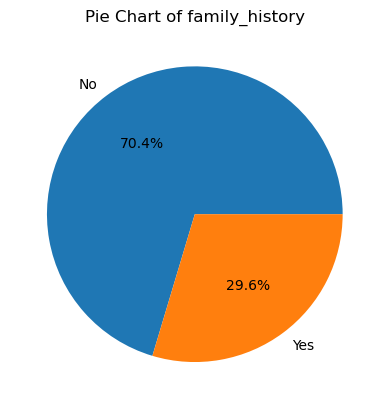

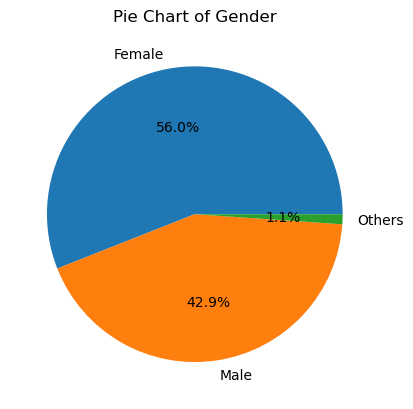

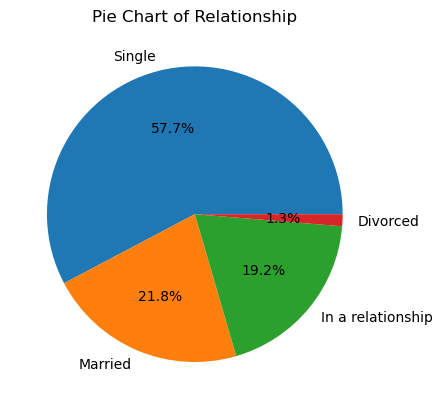

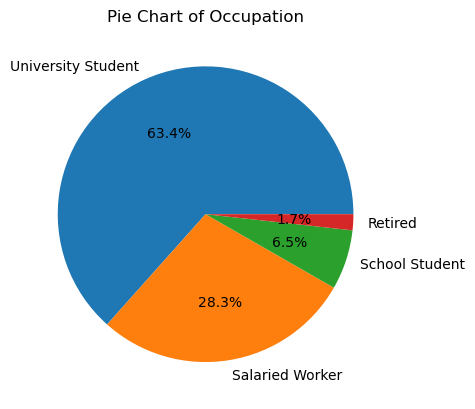

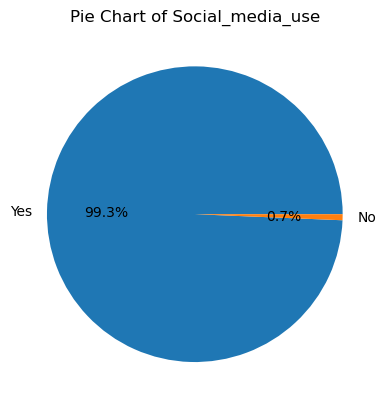

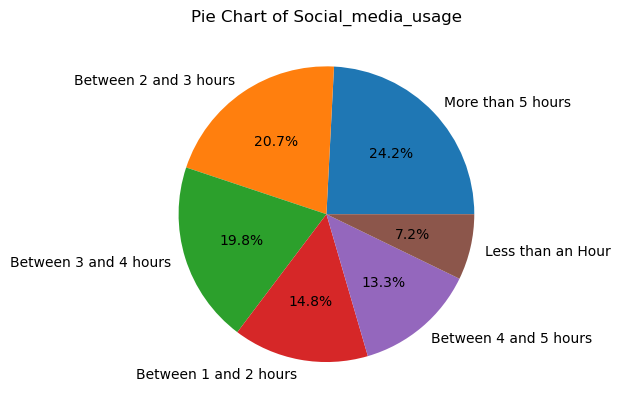

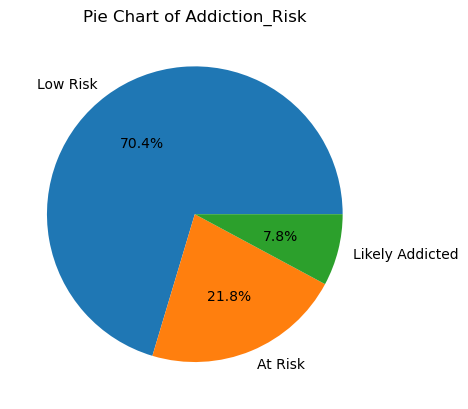

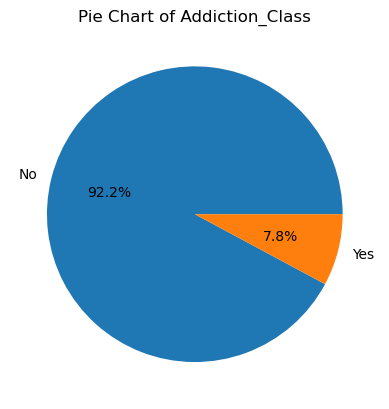

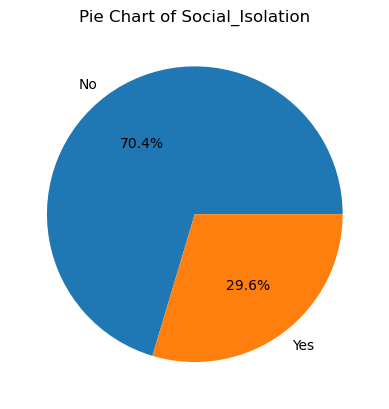

In [56]:
for category in categorial_columns:
    if category=='Timestamp' or category=='Social_media_type' or category=='Withdrawal_Symptoms': continue
    merged_df[category].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title('Pie Chart of ' +category)
    plt.ylabel('')
    plt.show()


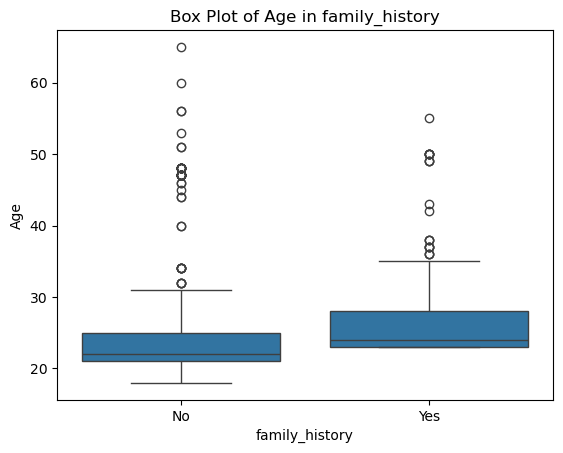

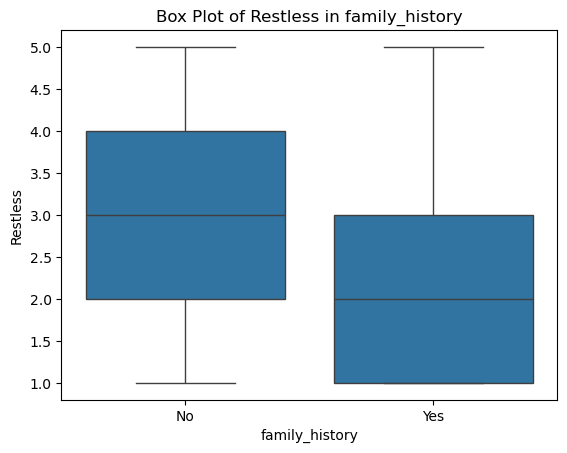

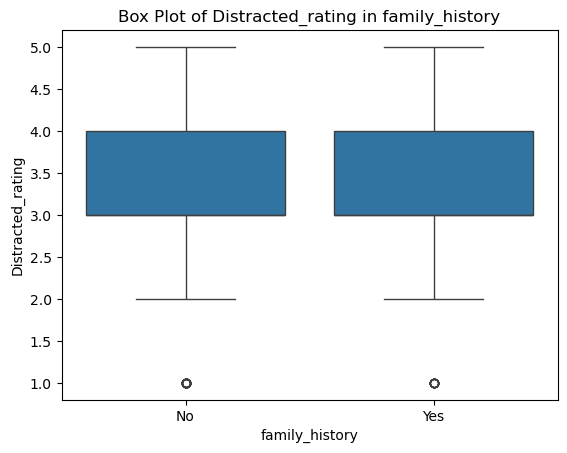

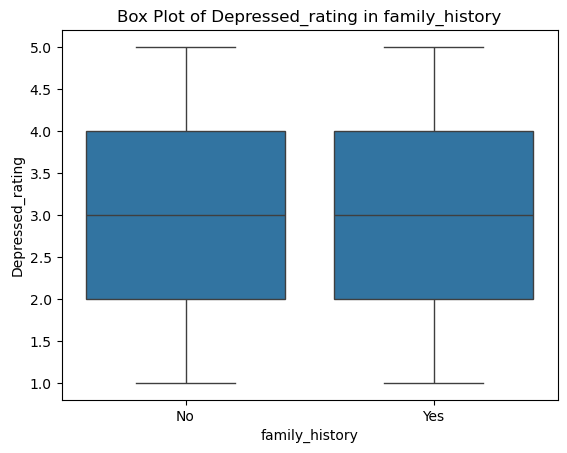

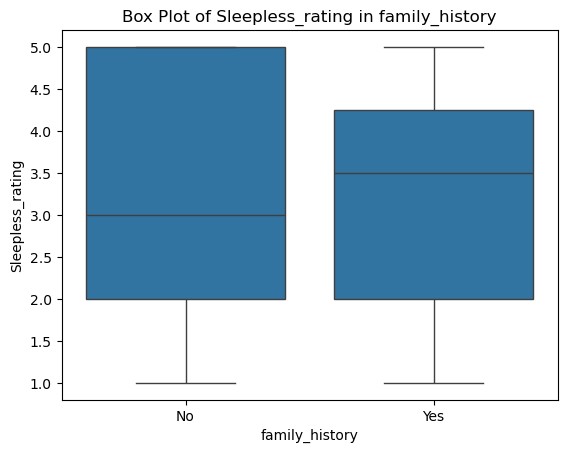

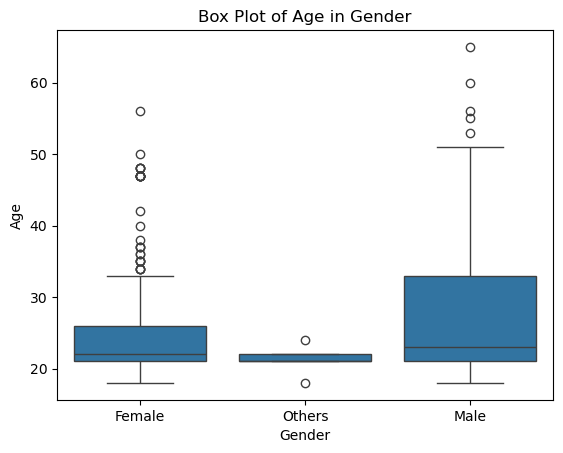

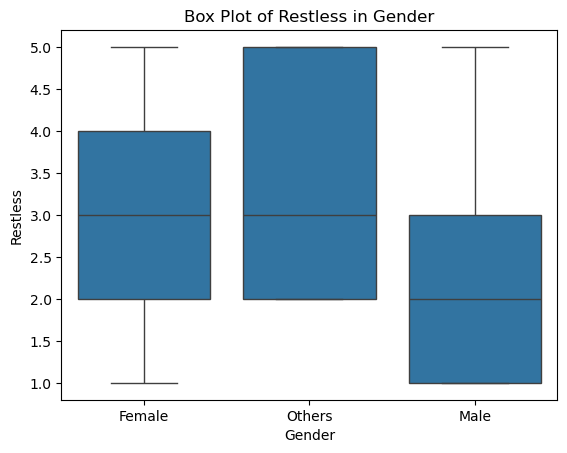

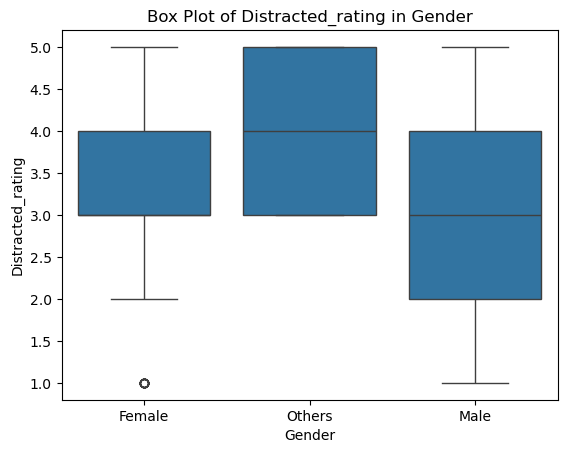

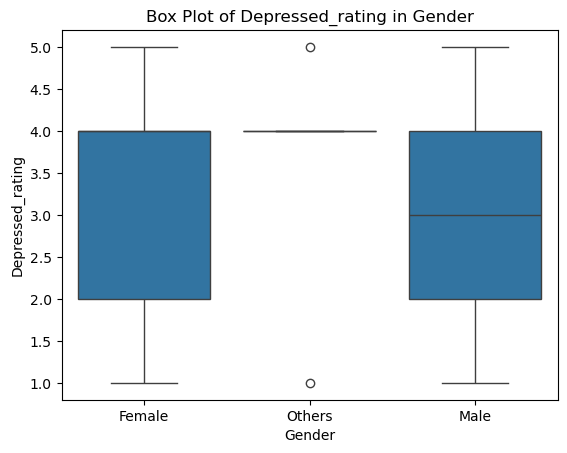

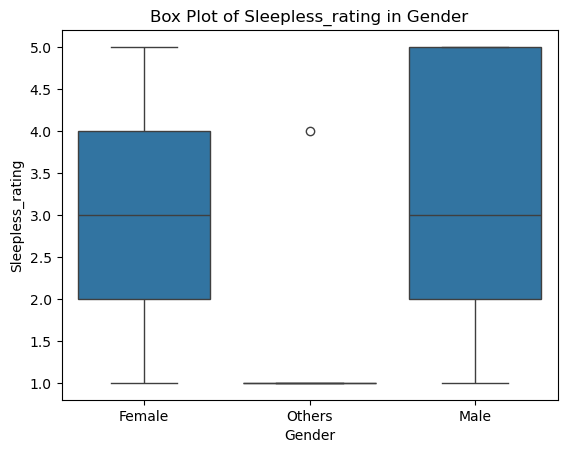

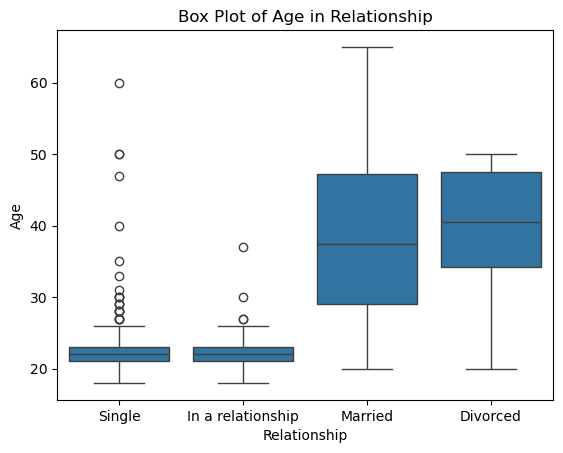

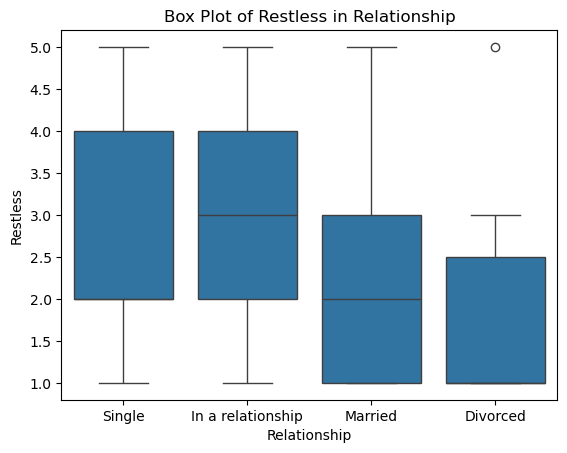

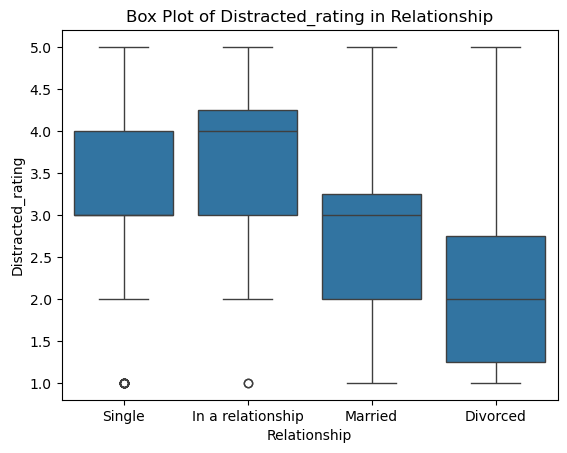

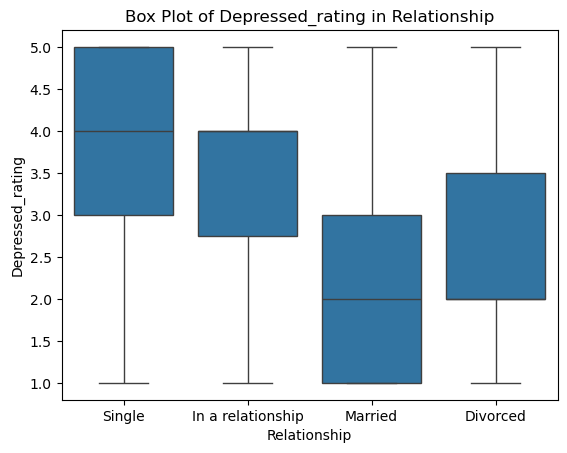

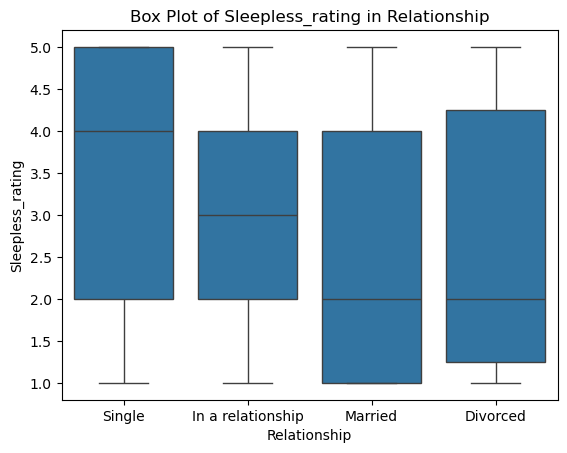

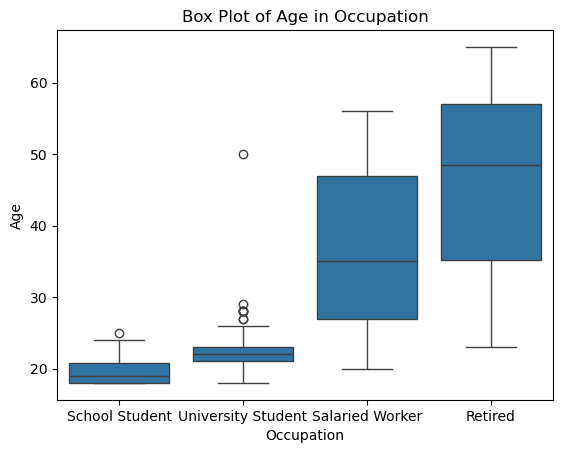

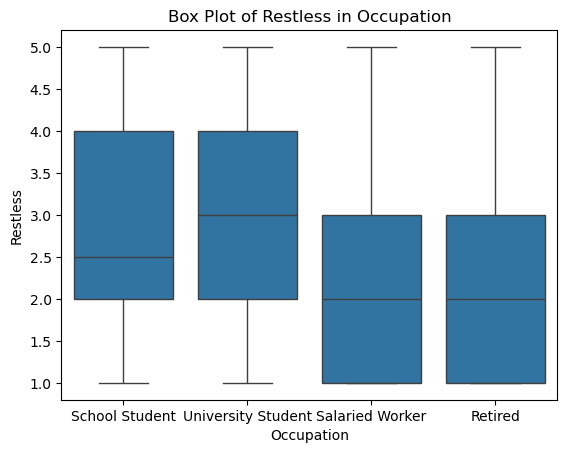

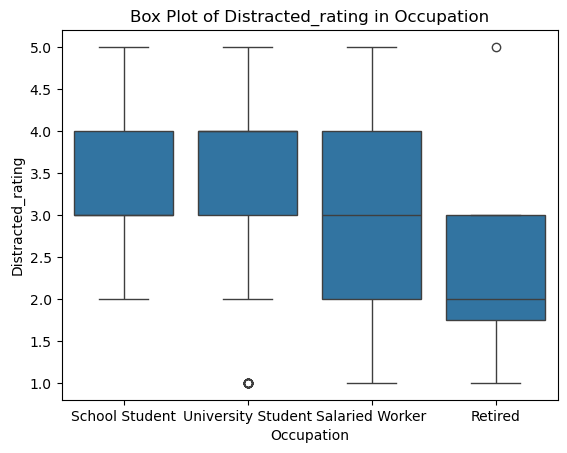

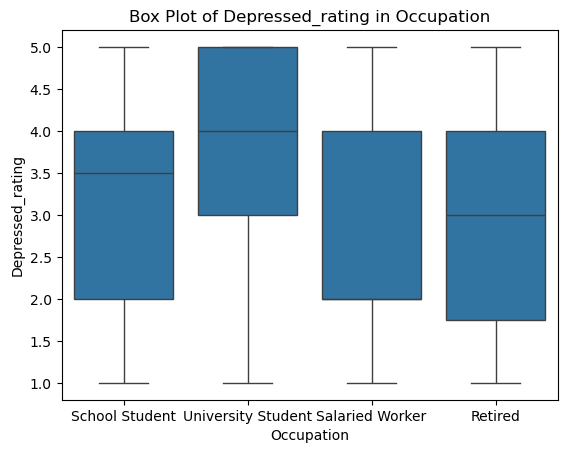

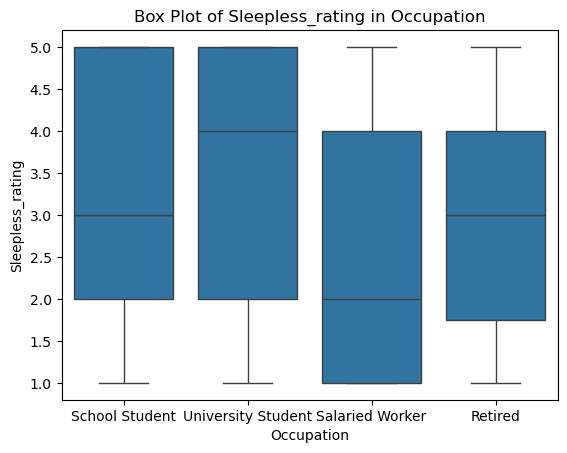

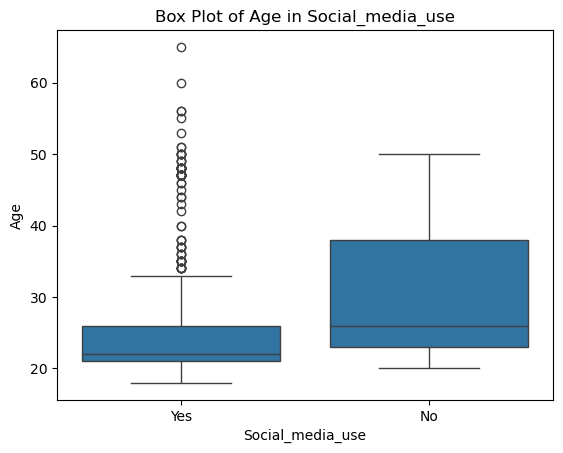

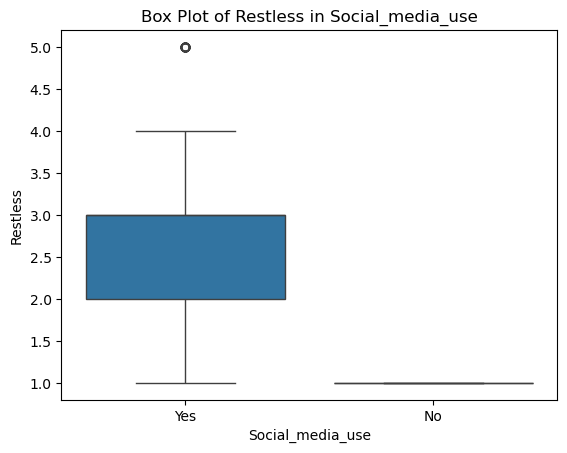

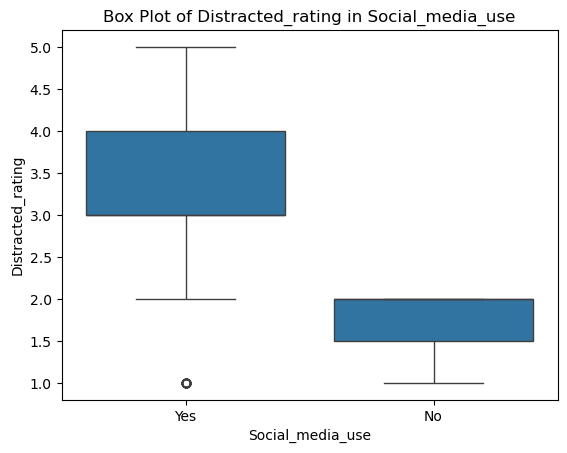

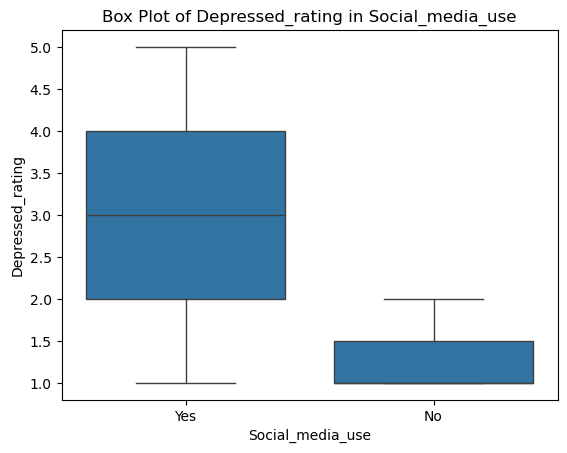

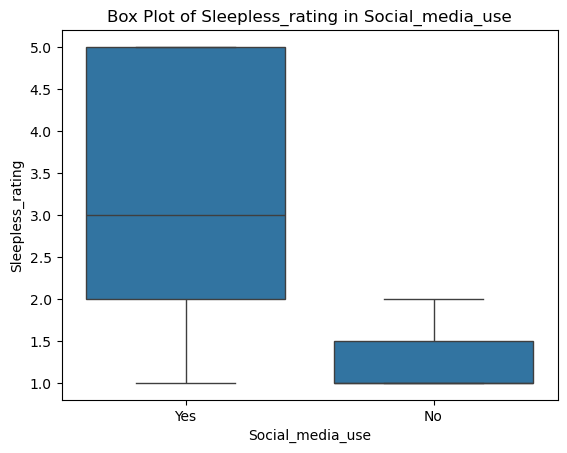

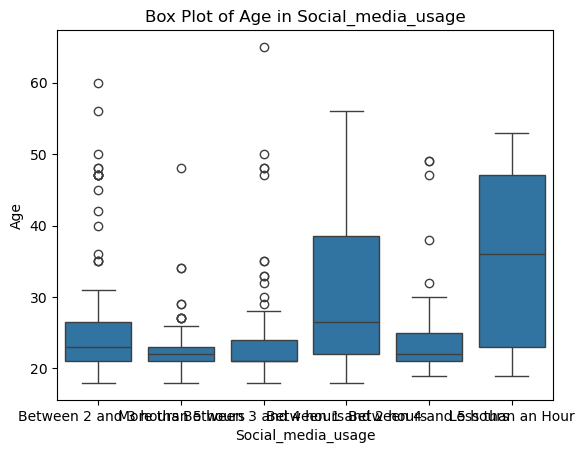

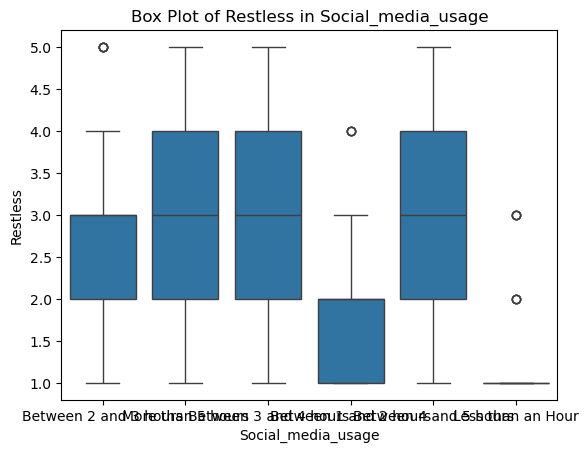

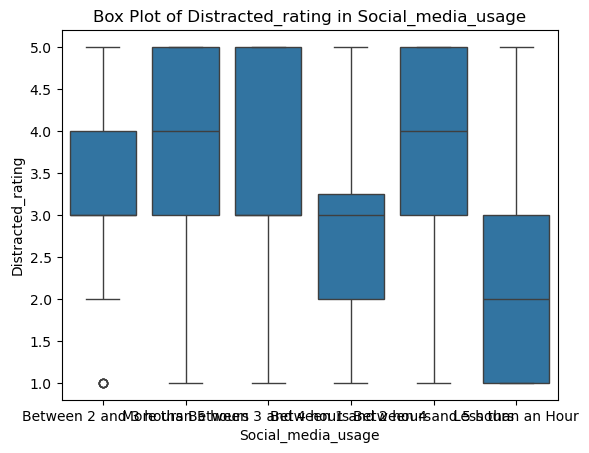

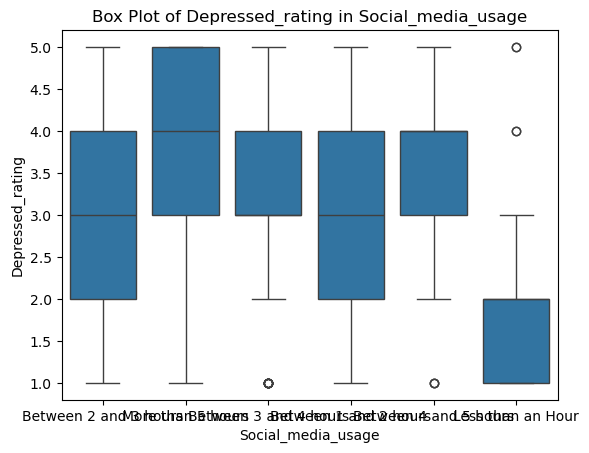

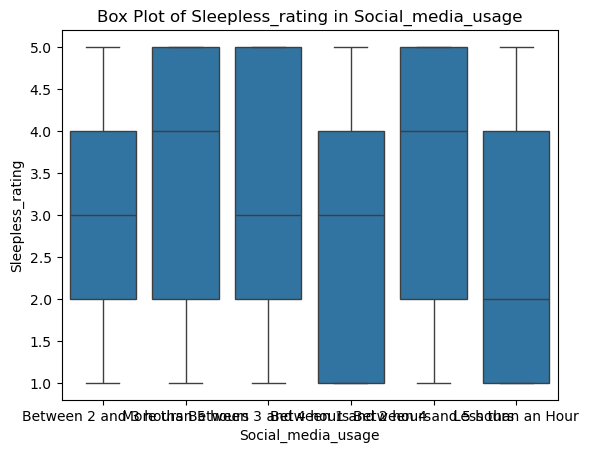

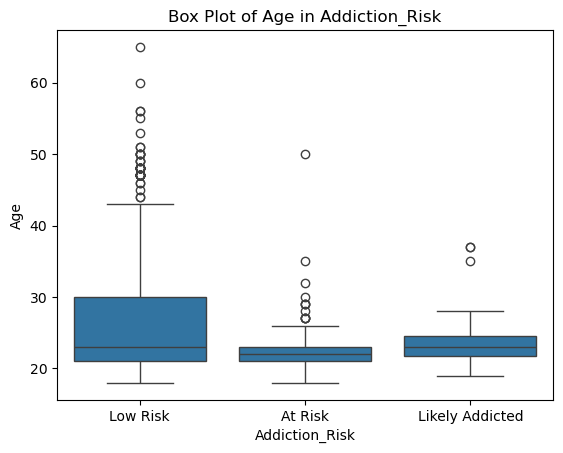

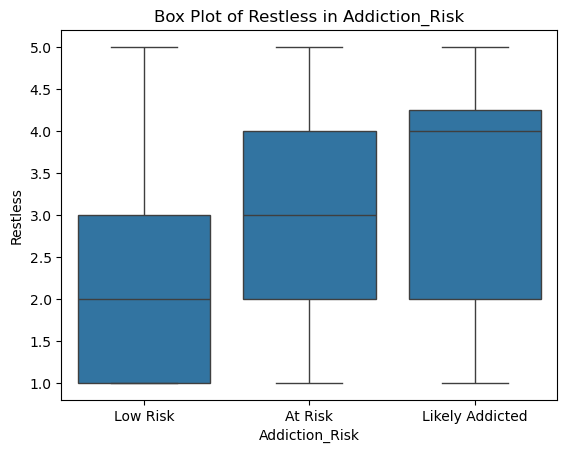

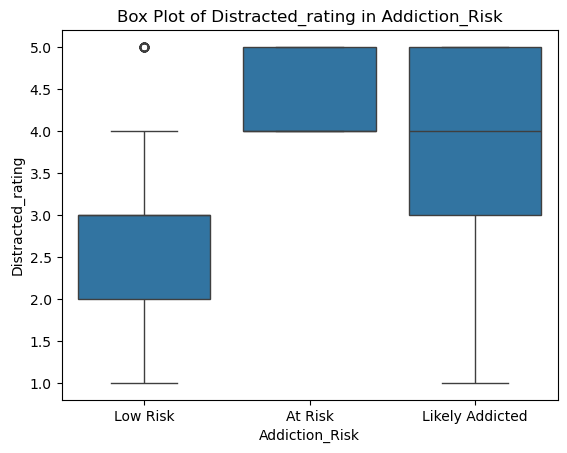

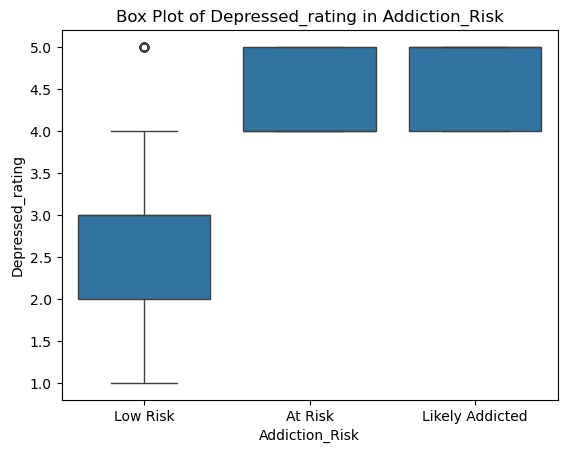

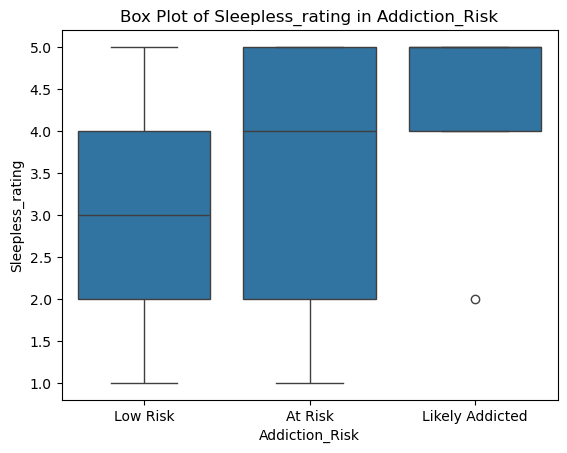

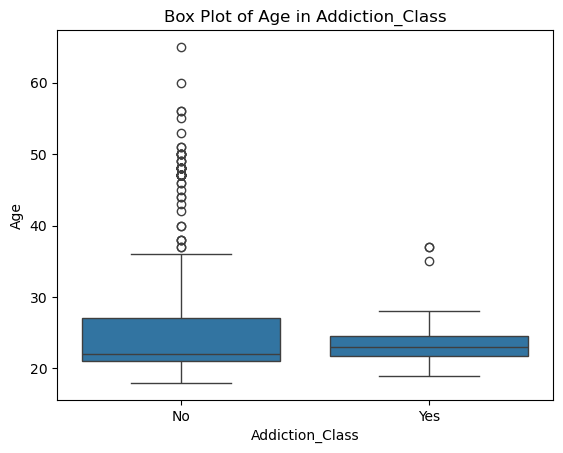

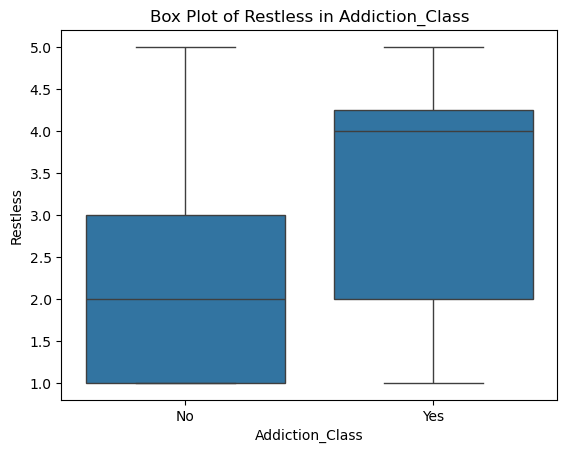

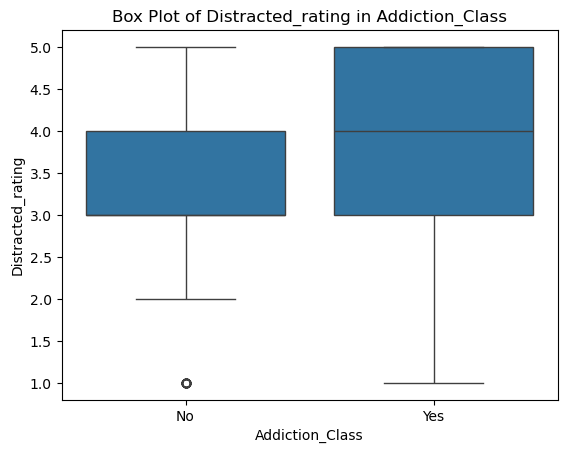

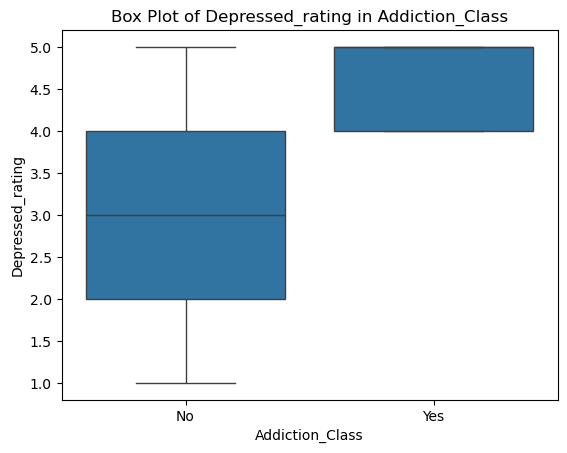

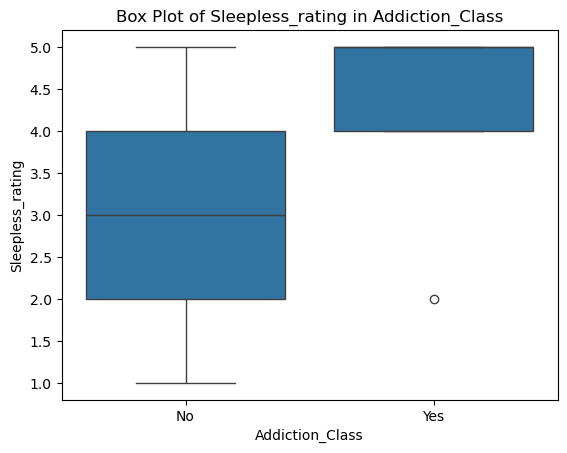

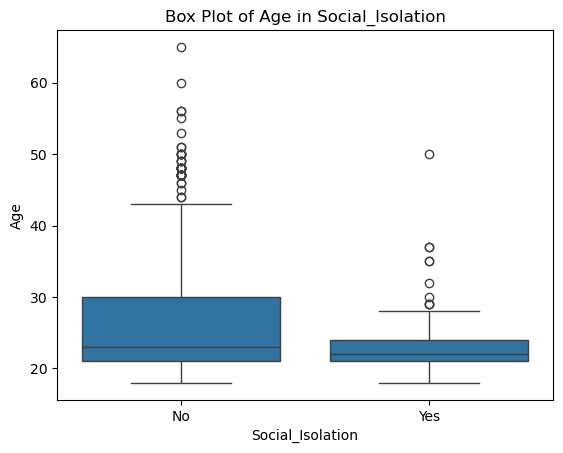

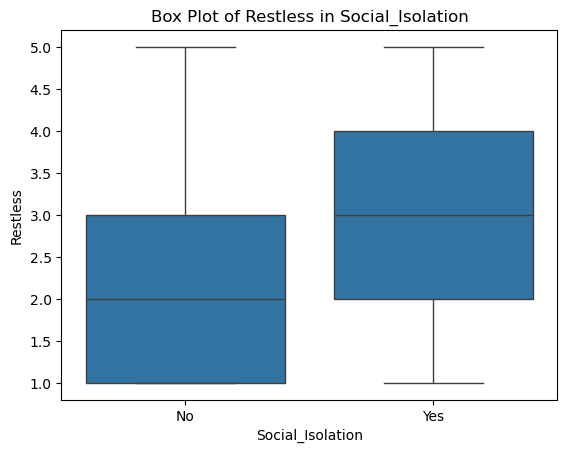

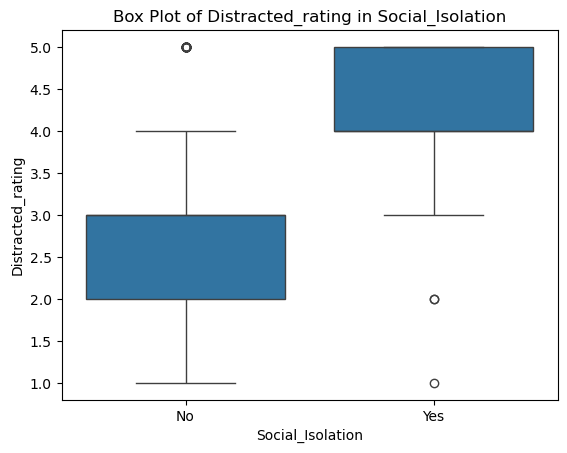

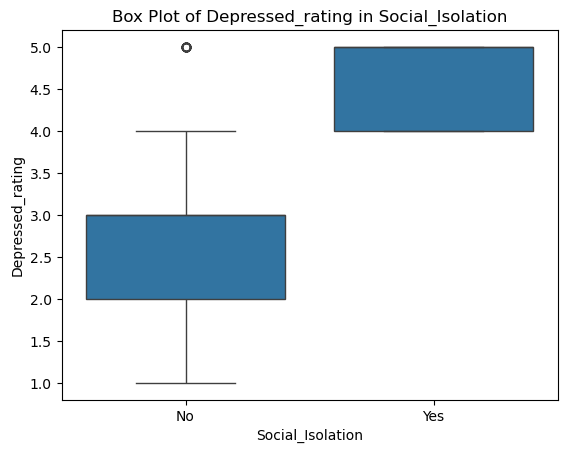

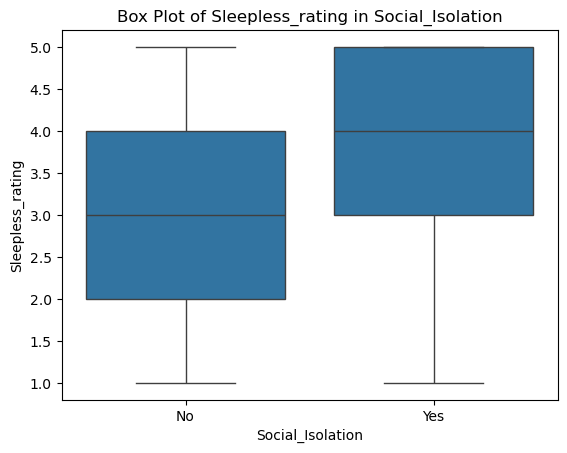

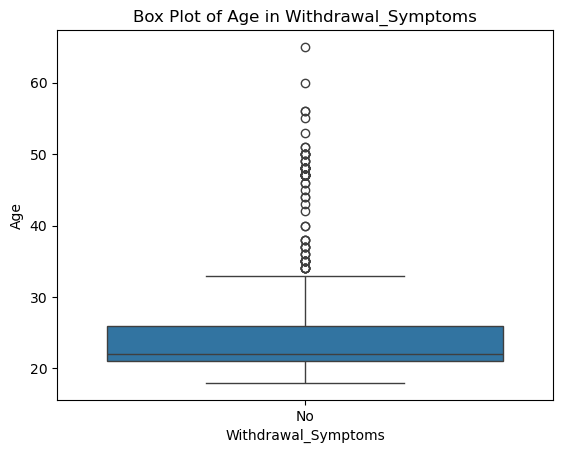

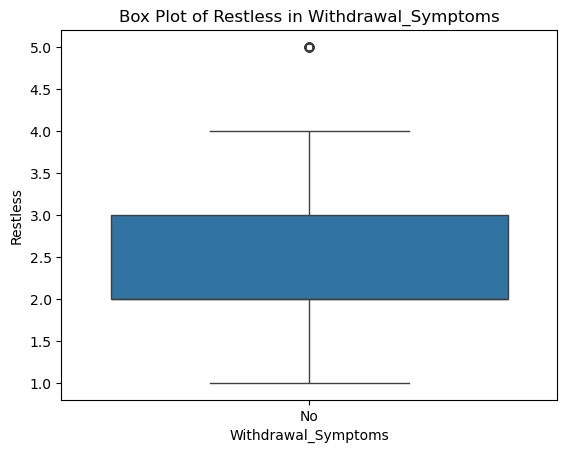

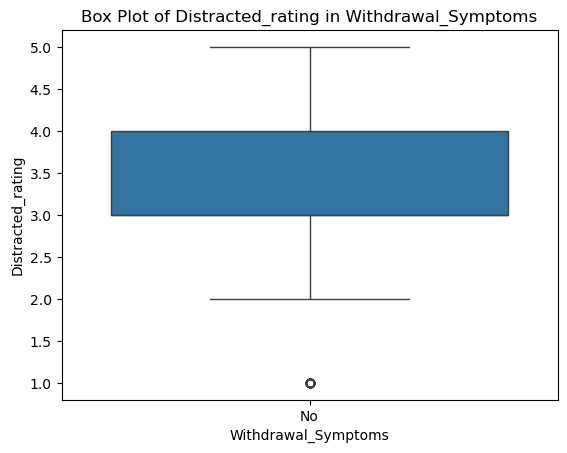

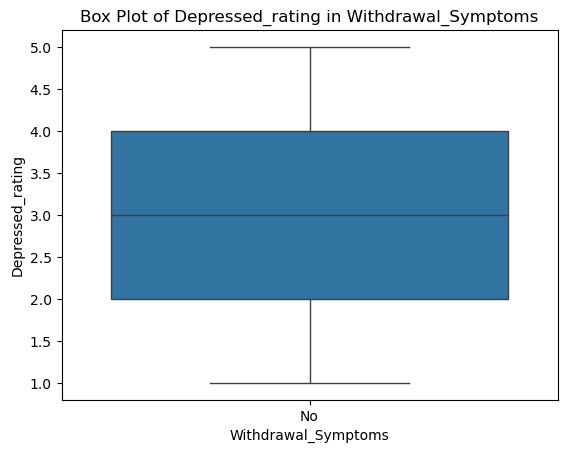

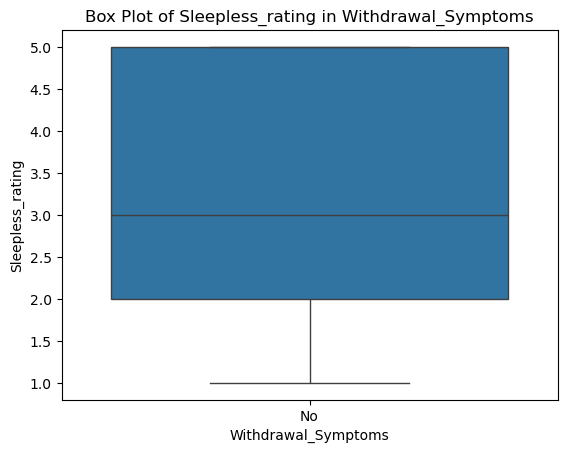

In [57]:
for cat in categorial_columns:
    for num in numerical_columns: 
        if cat=='Timestamp' or cat=='Social_media_type': continue
        sns.boxplot(x=cat,y=num,data=merged_df)
        plt.title('Box Plot of ' +num +' in ' +cat )
        plt.show()
    

Age_Group
15-30    3.522788
30-40    2.424242
40-50    2.000000
50-60    1.714286
60-70    1.000000
Name: Depressed_rating, dtype: float64


/var/folders/gw/g4f9j0rj55j7wlpd_183__qm0000gq/T/ipykernel_32406/4294963576.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = merged_df.groupby('Age_Group')['Depressed_rating'].mean()


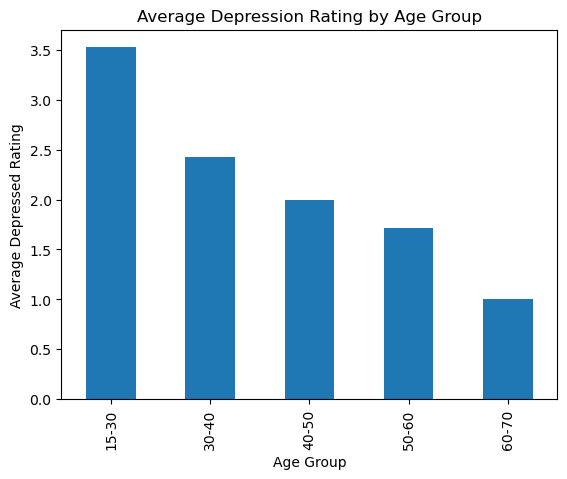

In [58]:
merged_df['Age_Group'] = pd.cut(merged_df['Age'], bins=[15, 30, 40,50,60,70], labels=["15-30", "30-40","40-50","50-60","60-70"])
group_means = merged_df.groupby('Age_Group')['Depressed_rating'].mean()
print(group_means)

group_means.plot(kind='bar', title="Average Depression Rating by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Depressed Rating")
plt.show()

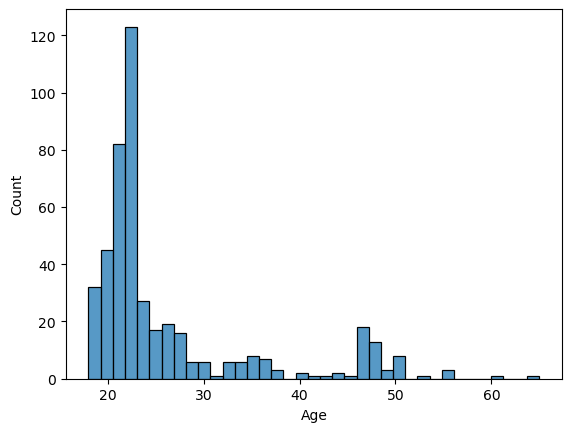

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(merged_df['Age'])
plt.show()

In [60]:
print(merged_df.columns)
merged_df.groupby('Gender')['Gender'].count()

Index(['Age', 'family_history', 'Timestamp', 'Gender', 'Relationship',
       'Occupation', 'Social_media_use', 'Social_media_type',
       'Social_media_usage', 'Restless', 'Distracted_rating',
       'Depressed_rating', 'Sleepless_rating', 'Trauma', 'Addiction_Risk',
       'Addiction_Class', 'Social_Isolation', 'Withdrawal_Symptoms',
       'Age_Group'],
      dtype='object')


Gender
Female    257
Male      197
Others      5
Name: Gender, dtype: int64

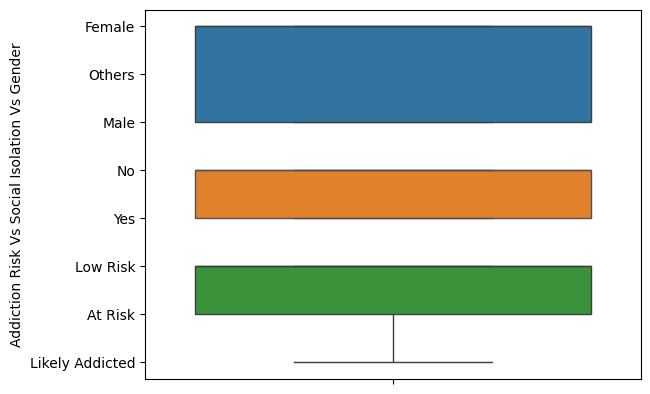

In [61]:
box = sns.boxplot(merged_df['Gender'])
box = sns.boxplot(merged_df['Social_Isolation'])
box = sns.boxplot(merged_df['Addiction_Risk'])
box.set(ylabel='Addiction Risk Vs Social Isolation Vs Gender')
plt.show()

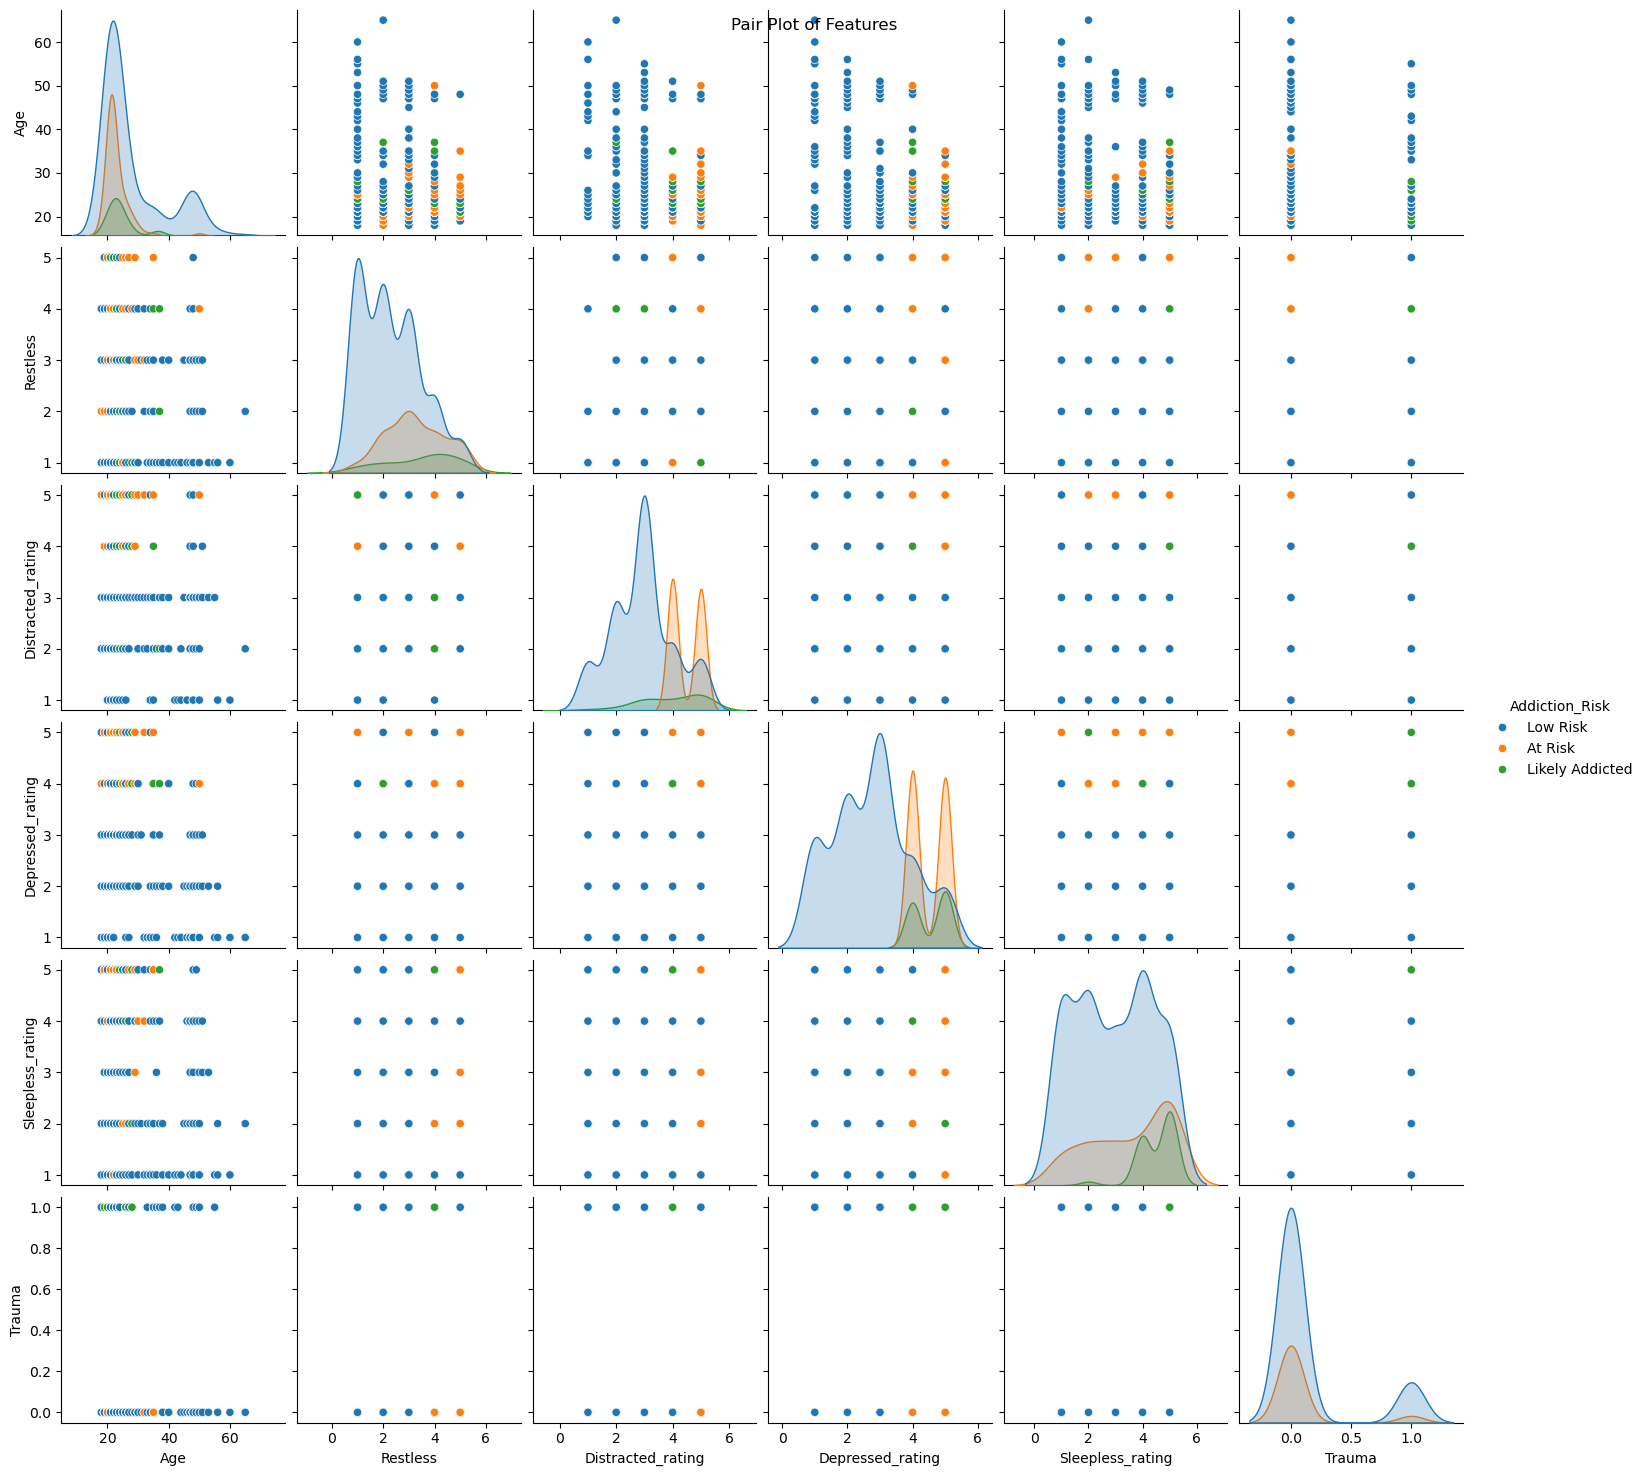

In [62]:
# Pairplot using Seaborn
sns.pairplot(merged_df, hue='Addiction_Risk', diag_kind='kde', height=2.5)
plt.suptitle('Pair Plot of Features')
plt.show()